# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.58'

## Specifying filetype, and folder as before

In [22]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [23]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [41]:
GroupN_df

filename rays_present  approx_split    Diad1_pos  \
0              K21-61-FI#2.txt        False    103.205802  1285.524321   
1              K21-61-FI#3.txt        False    103.238800  1285.458326   
2  K21-64-FI#1_CRR_DiadFit.txt         True    103.200303  1285.458326   
3  K21-64-FI#3_CRR_DiadFit.txt         True    103.211302  1285.425328   
4              K21-64-FI#4.txt        False    103.249799  1285.606815   
5  K21-64-FI#5_CRR_DiadFit.txt         True    103.222301  1285.414329   
6  K21-64-FI#6_CRR_DiadFit.txt         True    103.227801  1285.397830   
7  K21-64-FI#7_CRR_DiadFit.txt         True    103.244300  1285.370332   

     Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0  1388.730124  1265.159241  1410.184127  1370.504395      955.478360   
1  1388.697126  1265.269234  1410.156629  1370.482396      766.017540   
2  1388.658629  1265.098746  1410.063136  1370.454898      849.887977   
3  1388.636630  1265.115244  1410.057636  1370.449398     1269.525591   
4  1388.856615  1265.412224  1410.173128  1370.526393      856.575511   
5  1388.636630  1265.120744  1410.057636  1370.454898      945.054410   
6  1388.625631  1265.021751  1410.024638  1370.350405      701.246414   
7  1388.614632  1265.098746  1410.074135  1370.410901     1117.463853   

   Diad2_abs_prom  ...  Av_Diad_HB_prom_ratio  Diad2_height  HB2_height  \
0     1706.374275  ...              14.361843   2408.674278  830.308351   
1     1432.627080  ...              15.441599   2139.627080  807.312070   
2     1570.529417  ...              14.572750   2256.679426  806.640694   
3     2397.923475  ...              13.324381   3077.223463  853.625141   
4     1380.275696  ...              12.982869   2076.075683  813.782374   
5     1823.109985  ...              14.004097   2512.809998  823.478774   
6     1352.830017  ...              15.075139   2047.280014  787.435693   
7     2151.265518  ...              13.482530   2827.215515  832.899109   

   C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  \
0  734.866071   1663.478360  771.701891        708.000000        702.300003   
1  735.400219   1477.717552  758.146166        711.700012        707.000000   
2  718.270424   1540.887977  744.783805        691.000000        686.150009   
3  725.962205   1952.025591  776.781263        682.500000        679.299988   
4  718.741649   1556.675517  760.243530        700.100006        695.799988   
5  724.468141   1641.154416  763.452421        696.100006        689.700012   
6  718.615856   1401.146408  747.219754        699.899994        694.449997   
7  716.717713   1795.763841  759.349289        678.299988        675.949997   

   C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  
0                4.854557               1.003426  
1                3.996572               1.007268  
2                4.213833               0.994483  
3                4.594842               1.007645  
4                6.006580               1.001727  
5                4.901246               1.003628  
6                4.548498               0.997553  
7                4.652659               1.001921  

[8 rows x 41 columns]

### Now load one file from this group to tweak parameters for

In [42]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'K21-61-FI#2.txt'

### Lets plot the diad to have a look at it

K21-61-FI#2.txt


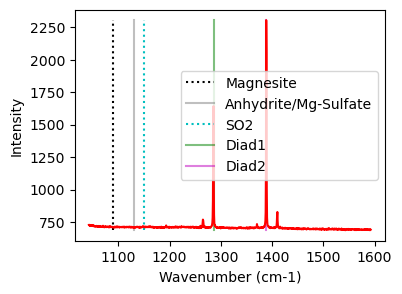

In [43]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [44]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [45]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=1,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1330, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=955.4783600116068, HB_prom=60.90190300121071, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.470024       1285.470074         0.00182       1433.106826   

   Diad1_Voigt_Sigma Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           0.552661              None  1265.202384  102.331037   0.801819   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             988.944797        2.918339        0.583487    1.105321   

         Diad1_refit  
0  Flagged Warnings:

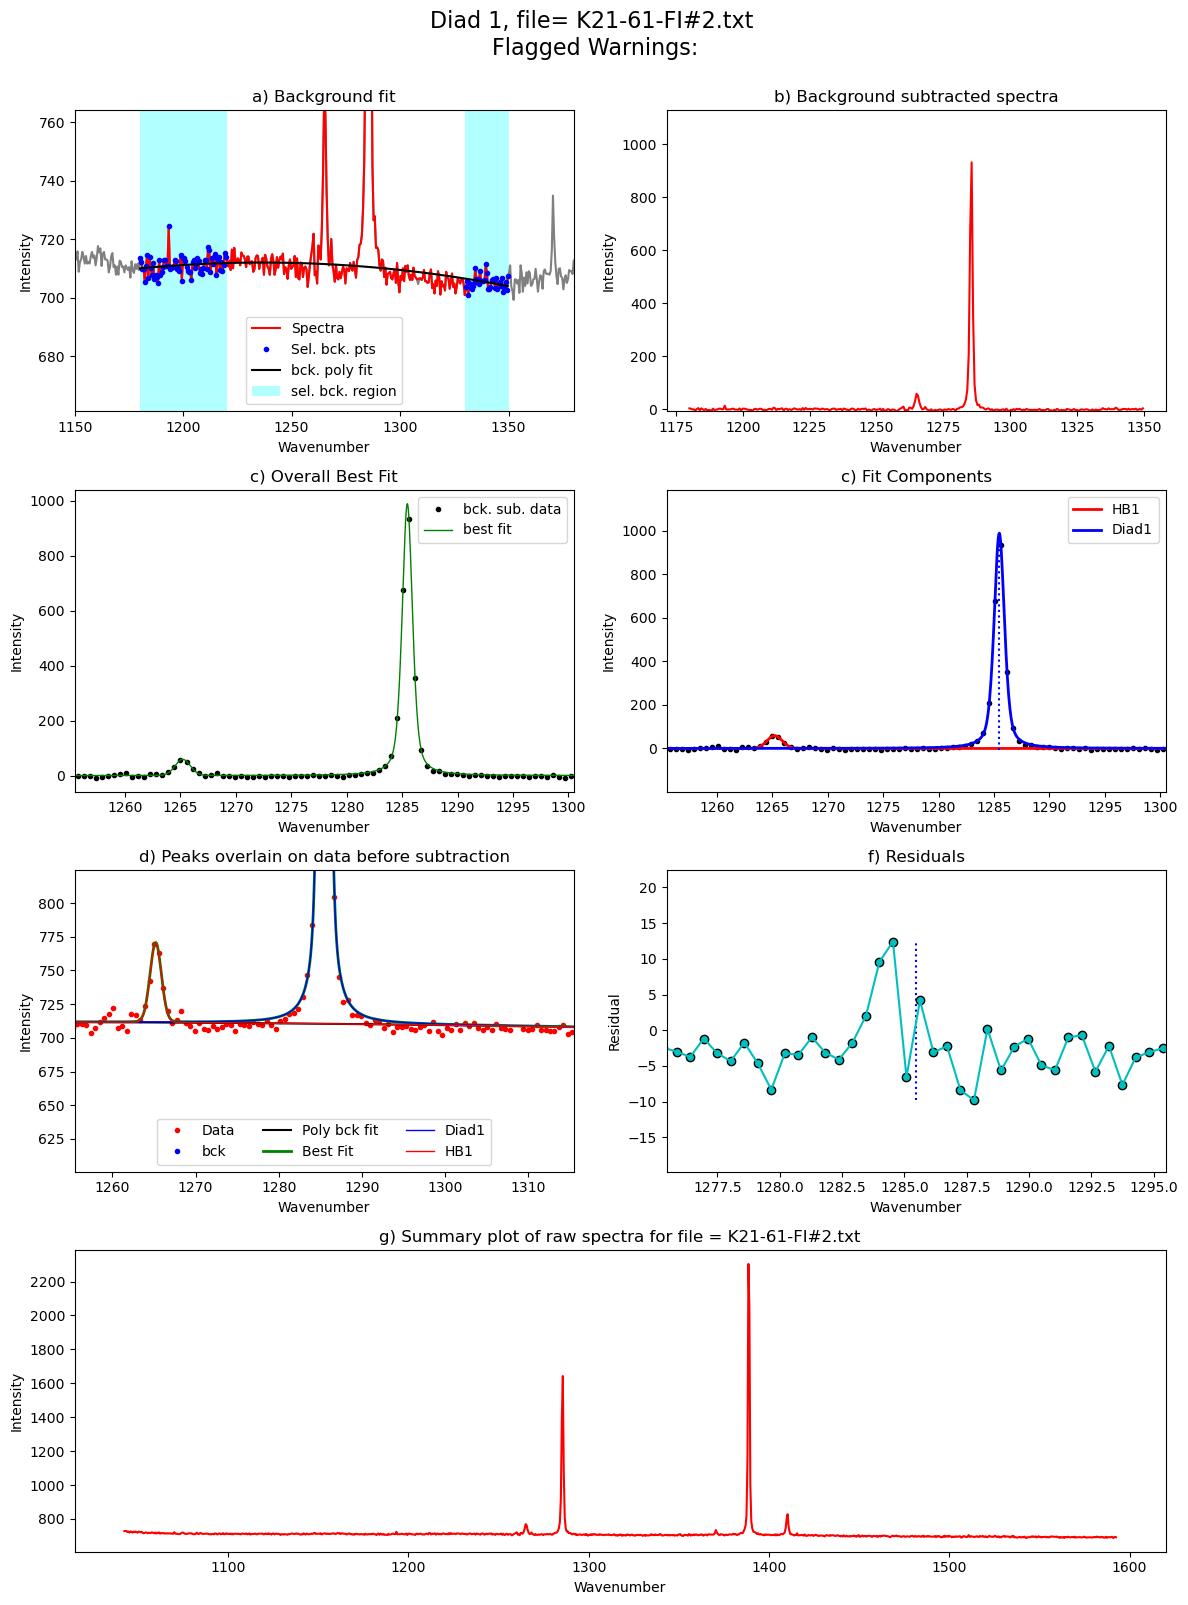

In [46]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [47]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [48]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=1, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3,
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=1000, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1706.3742751526304, HB_prom=130.9083572483446, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=26.966076748076375)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.770247       1388.770197        0.000935       2295.828835   

   Diad2_Voigt_Sigma Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.480067              None  1410.117686  255.592817   0.608199   

      C13_Cent   C13_Area  C13_Sigma  Diad2_Combofit_Height  Diad2_Residual  \
0  1370.320522  35.672377   0.239659            1864.989323        2.822183   

   Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  
0        0.526826    0.960135  Flagged Warnings:

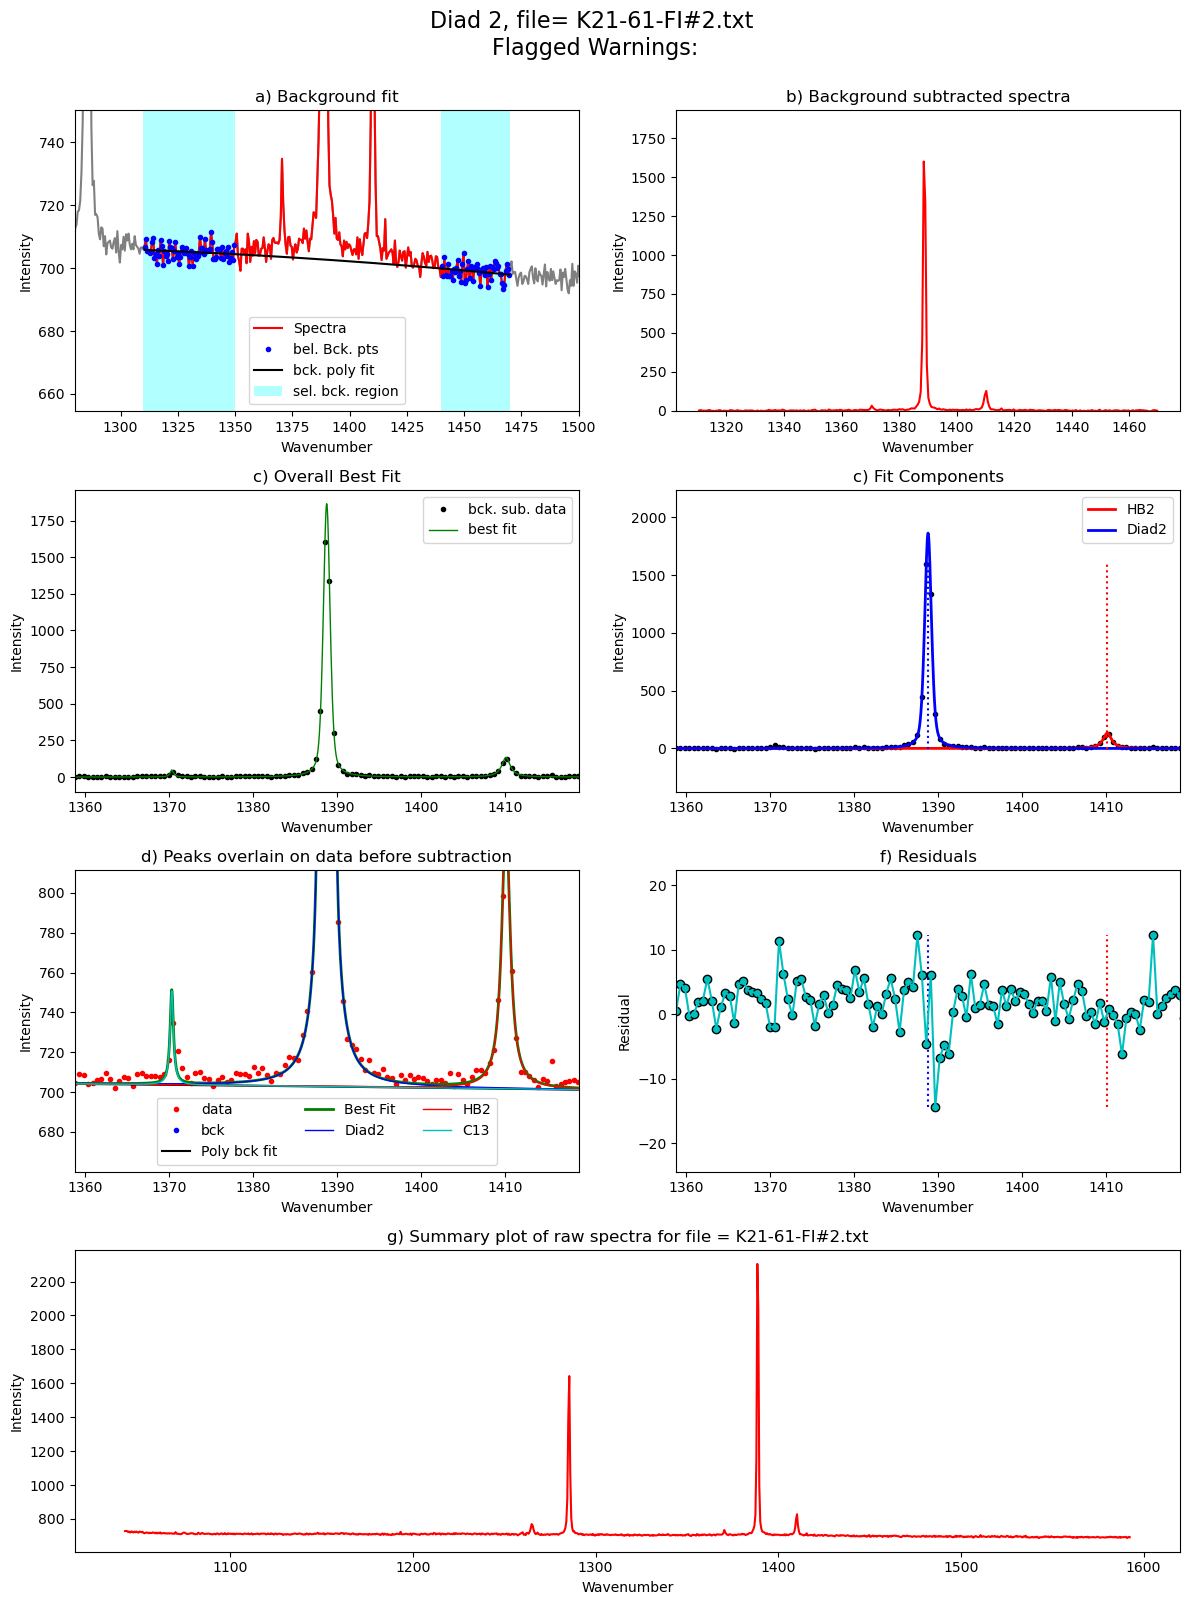

In [32]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

### Update the sigma

In [33]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.480067298542404


## Loop over all the files in the group
- This will loop over all the 

100%|██████████| 8/8 [00:21<00:00,  2.73s/it]


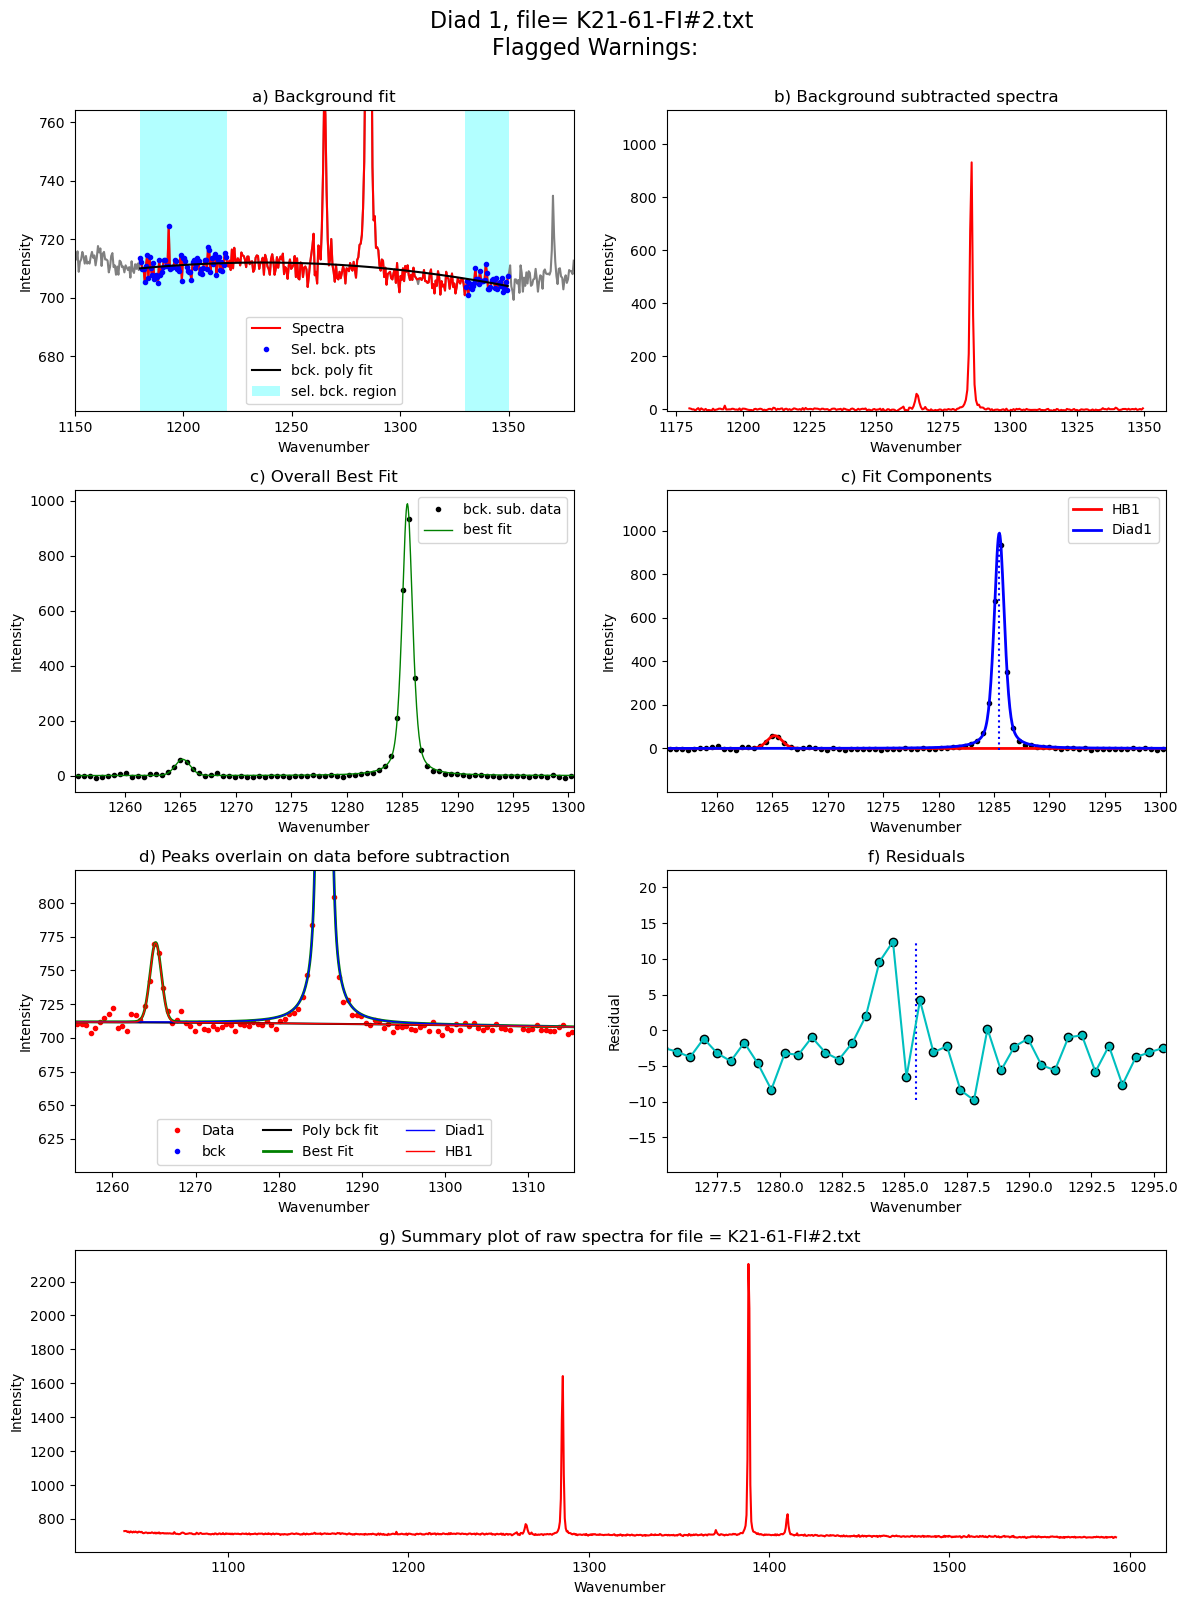

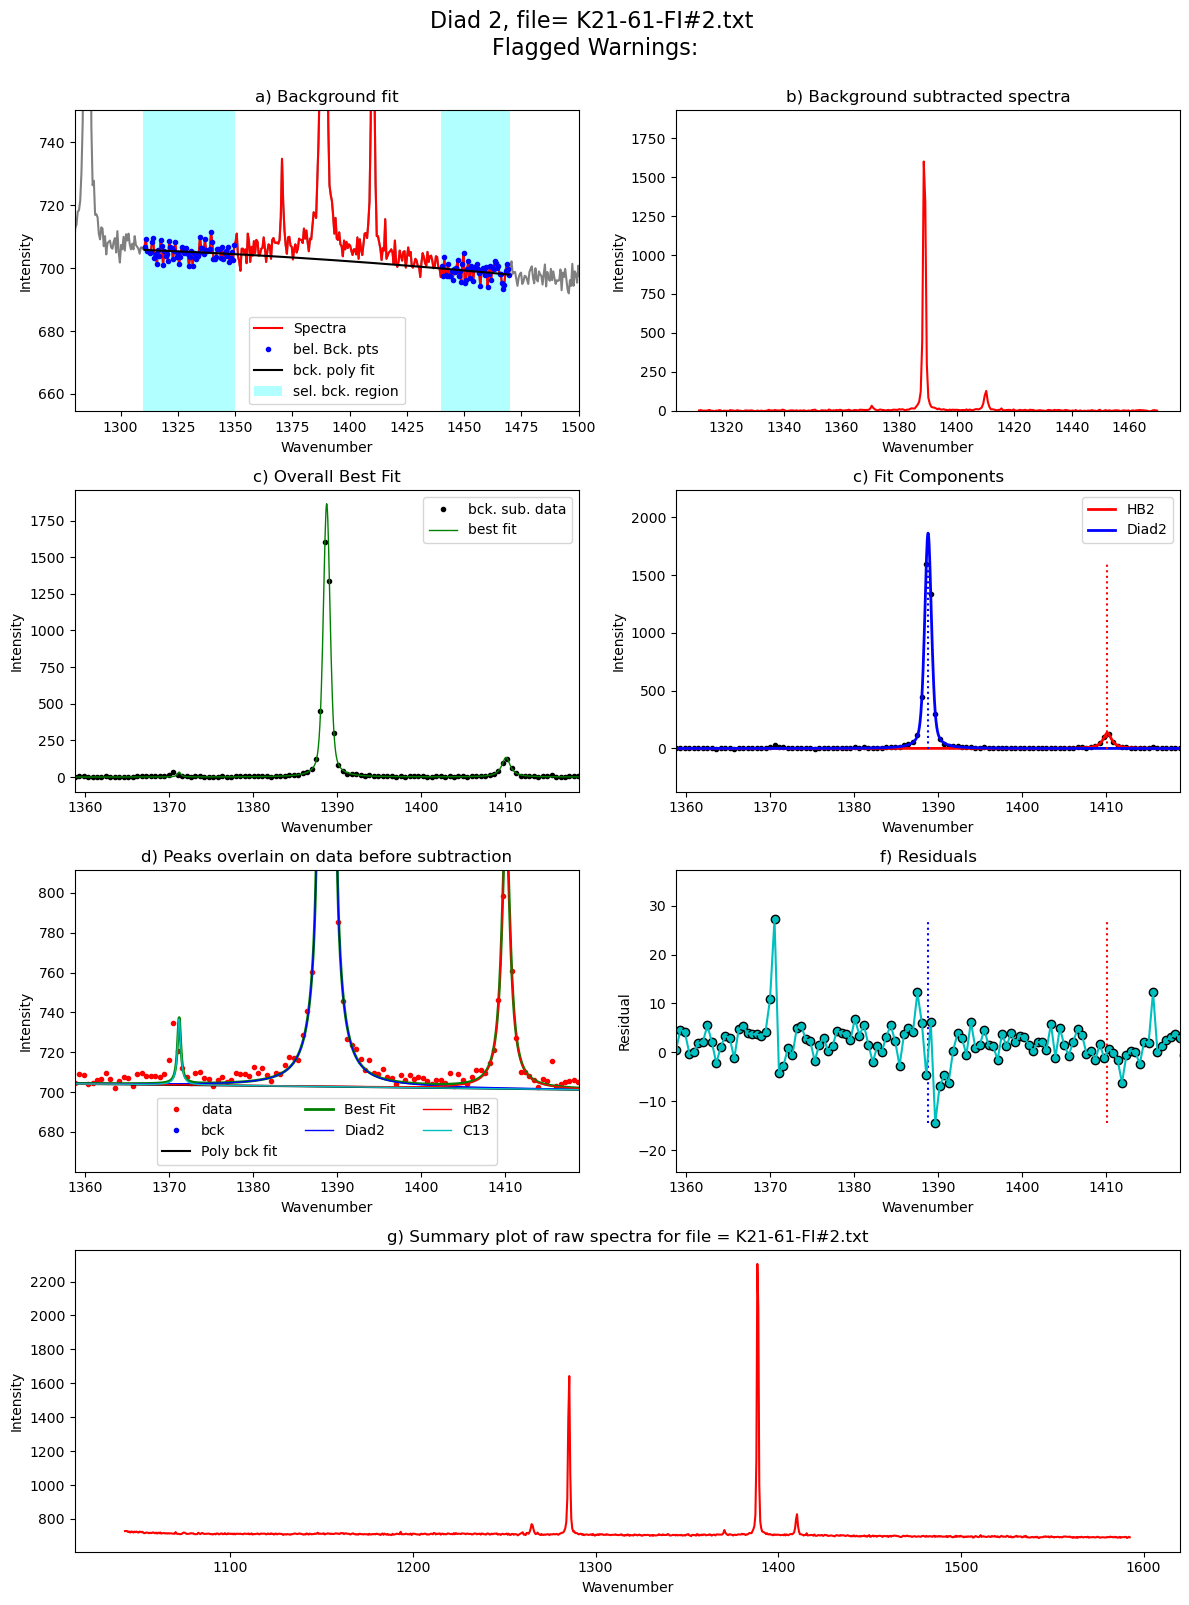

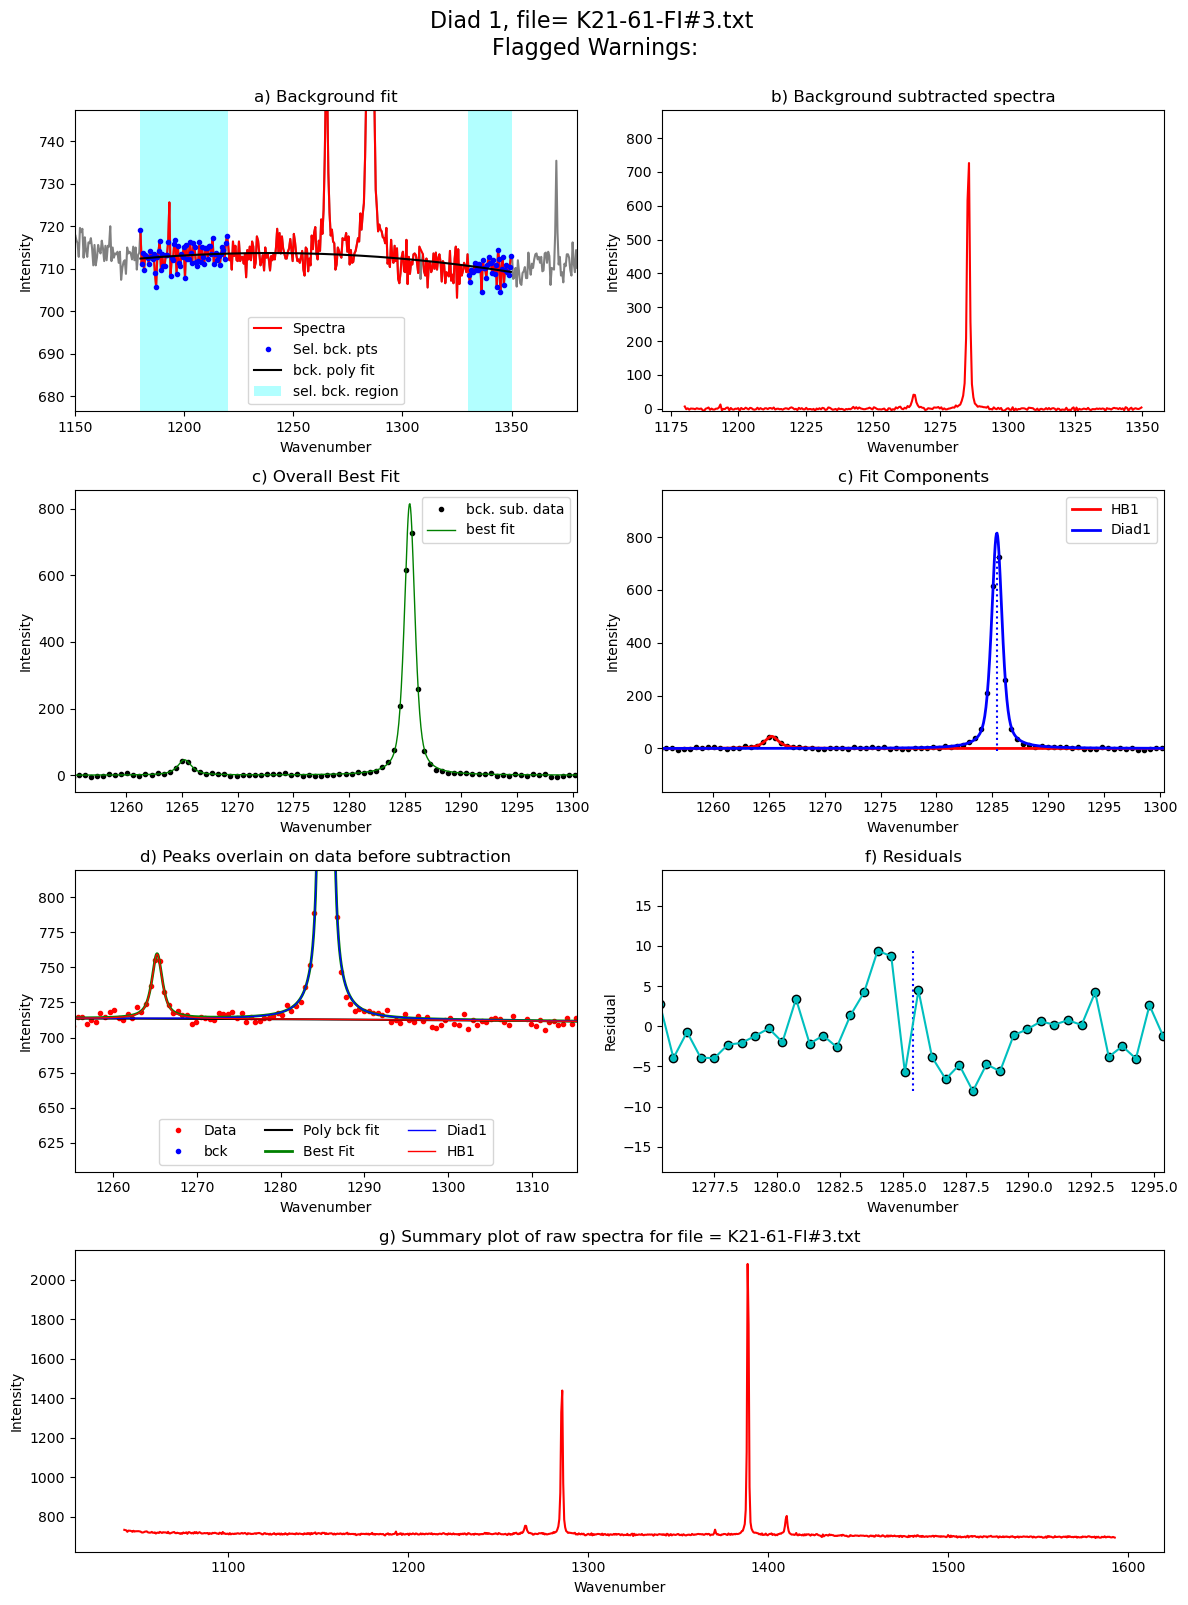

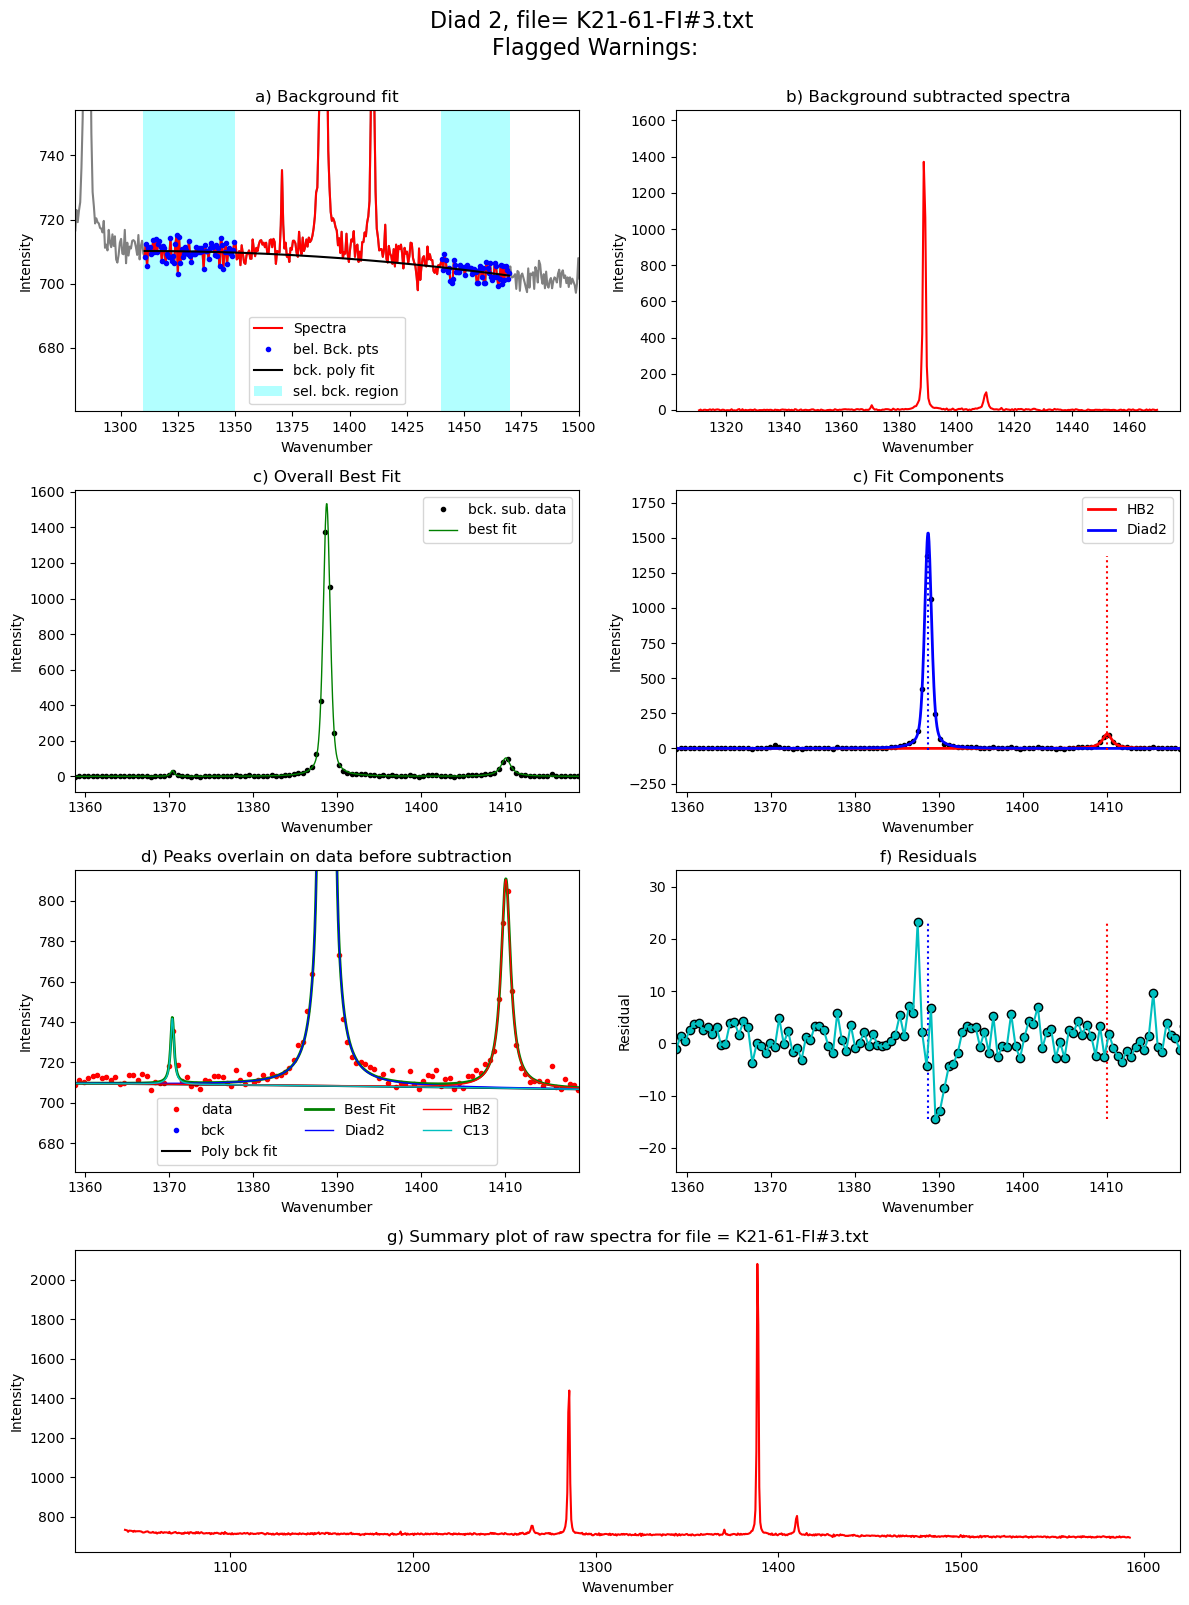

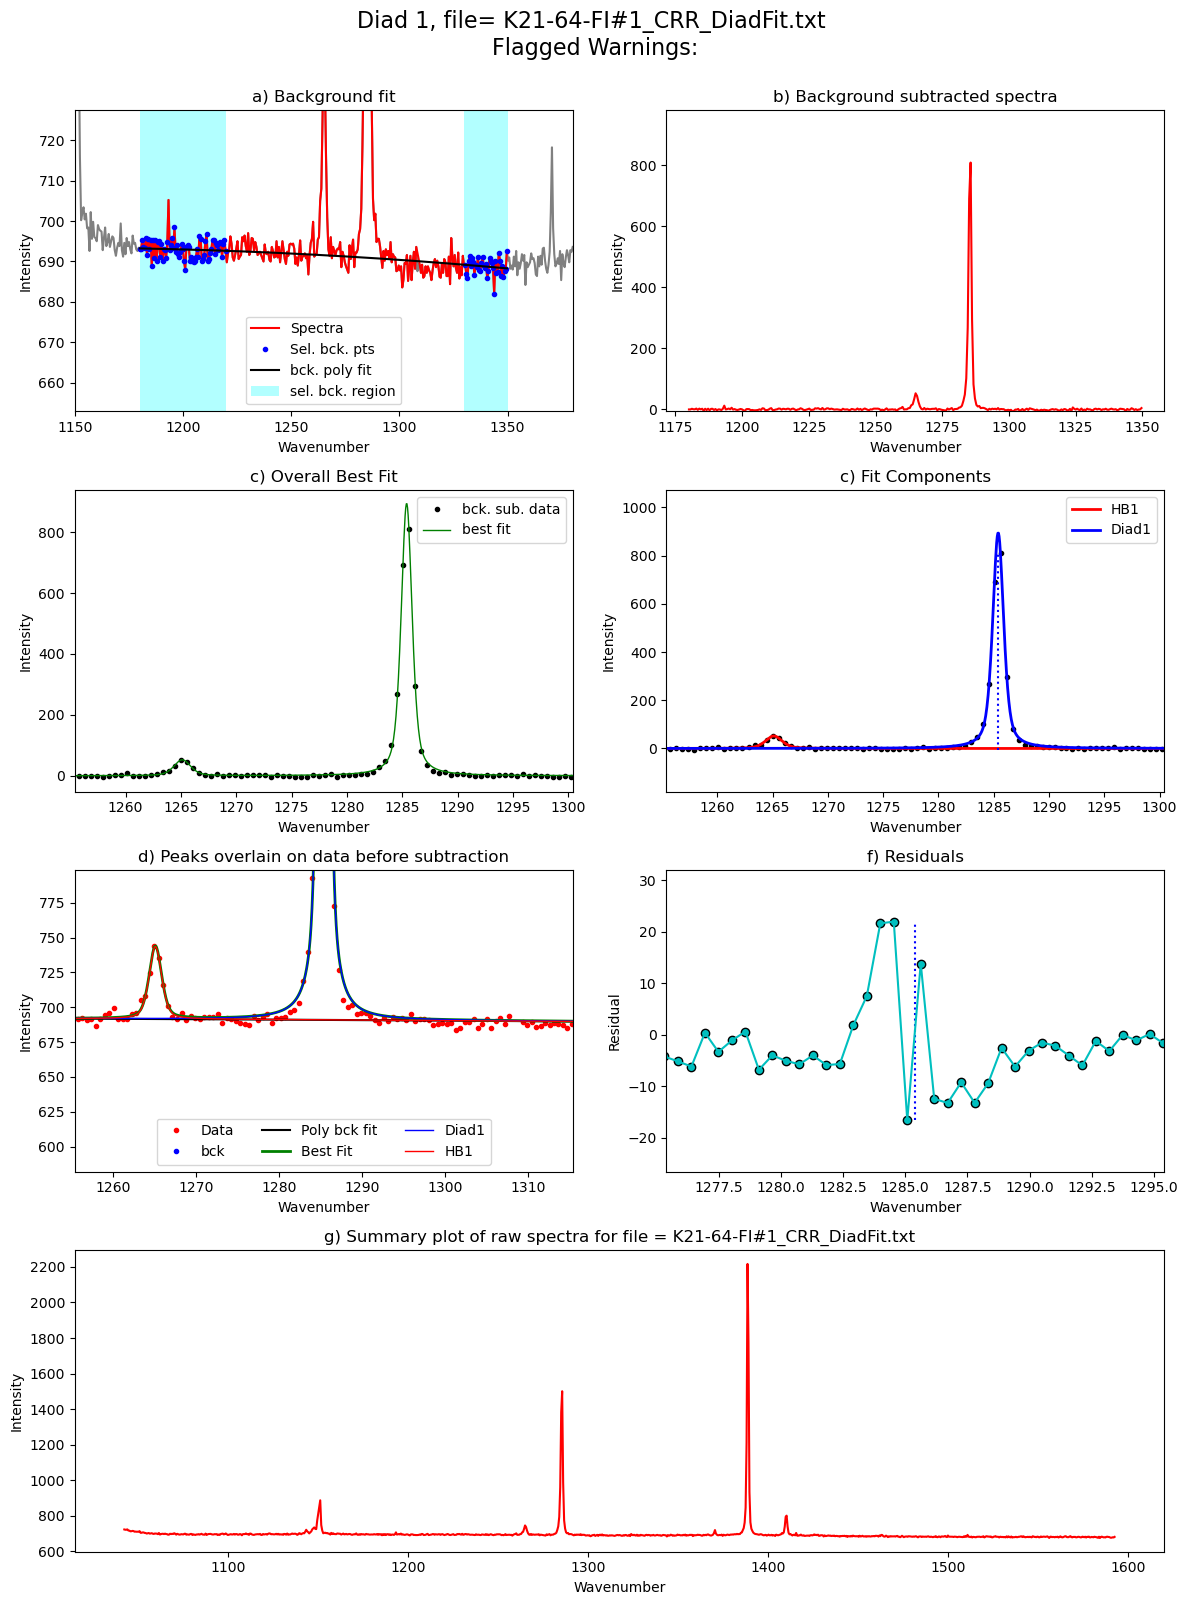

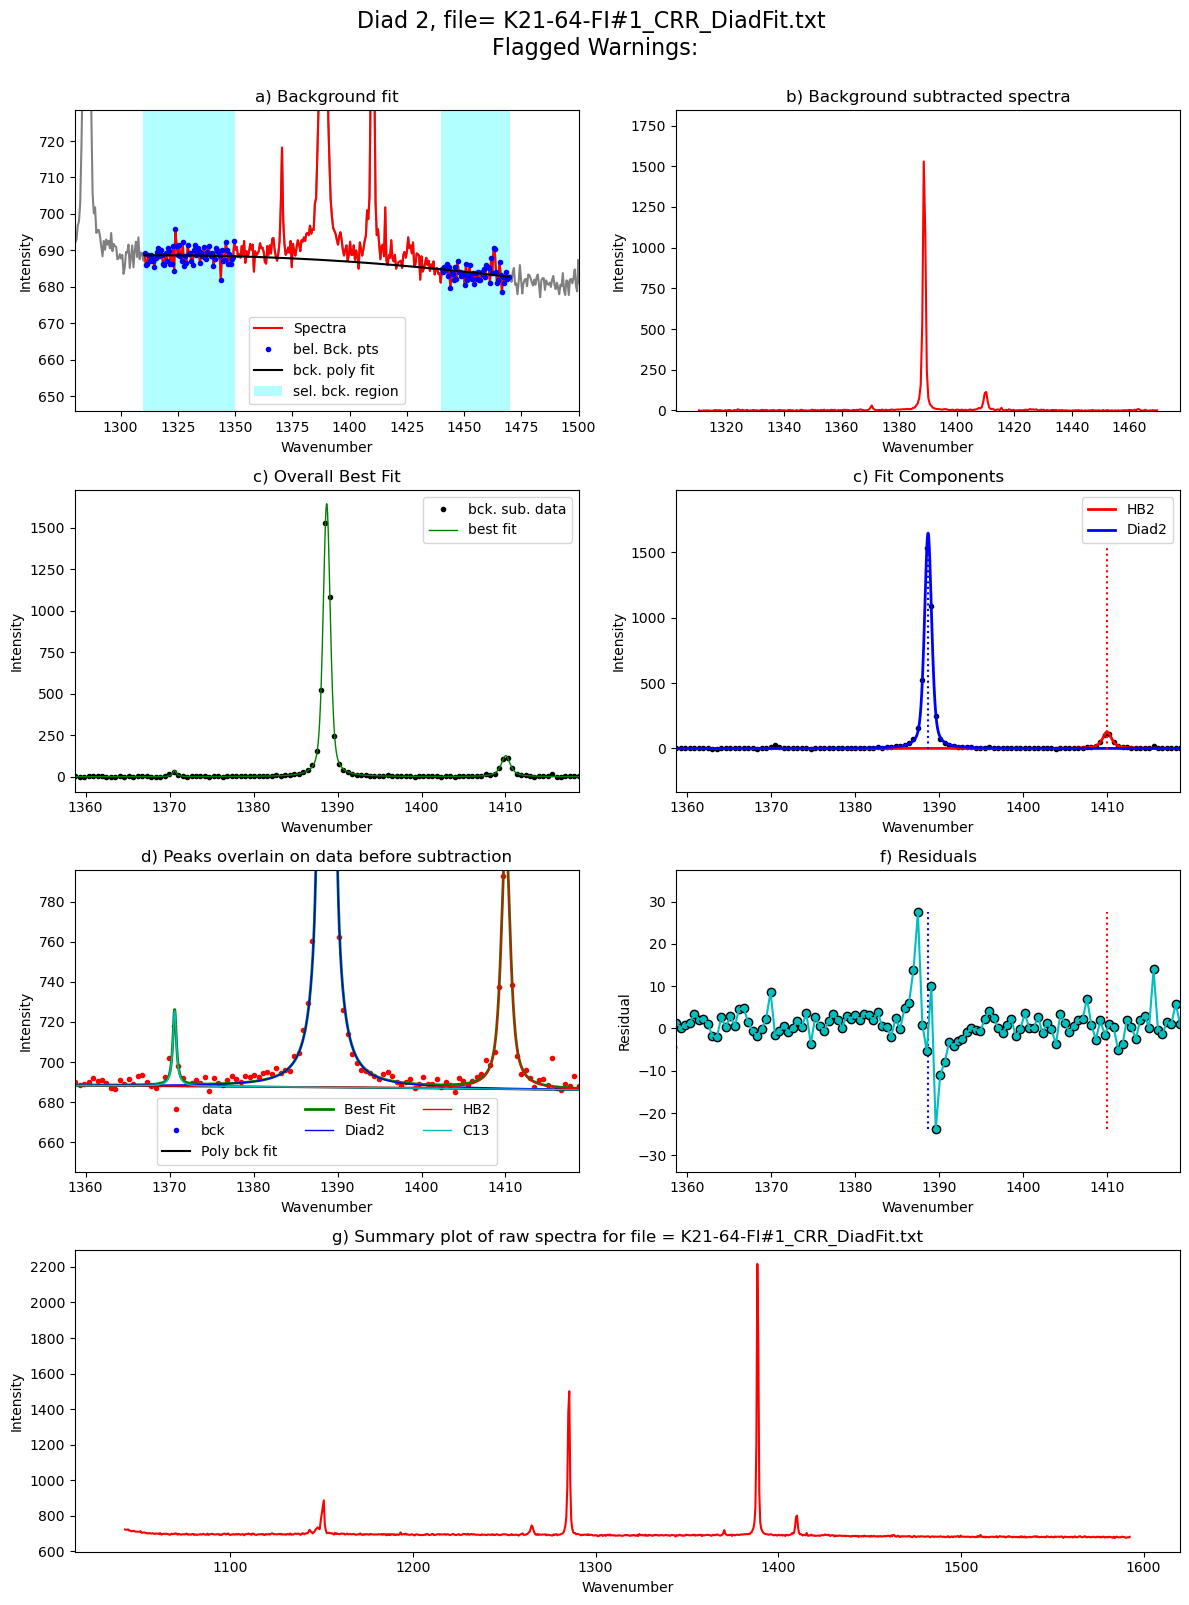

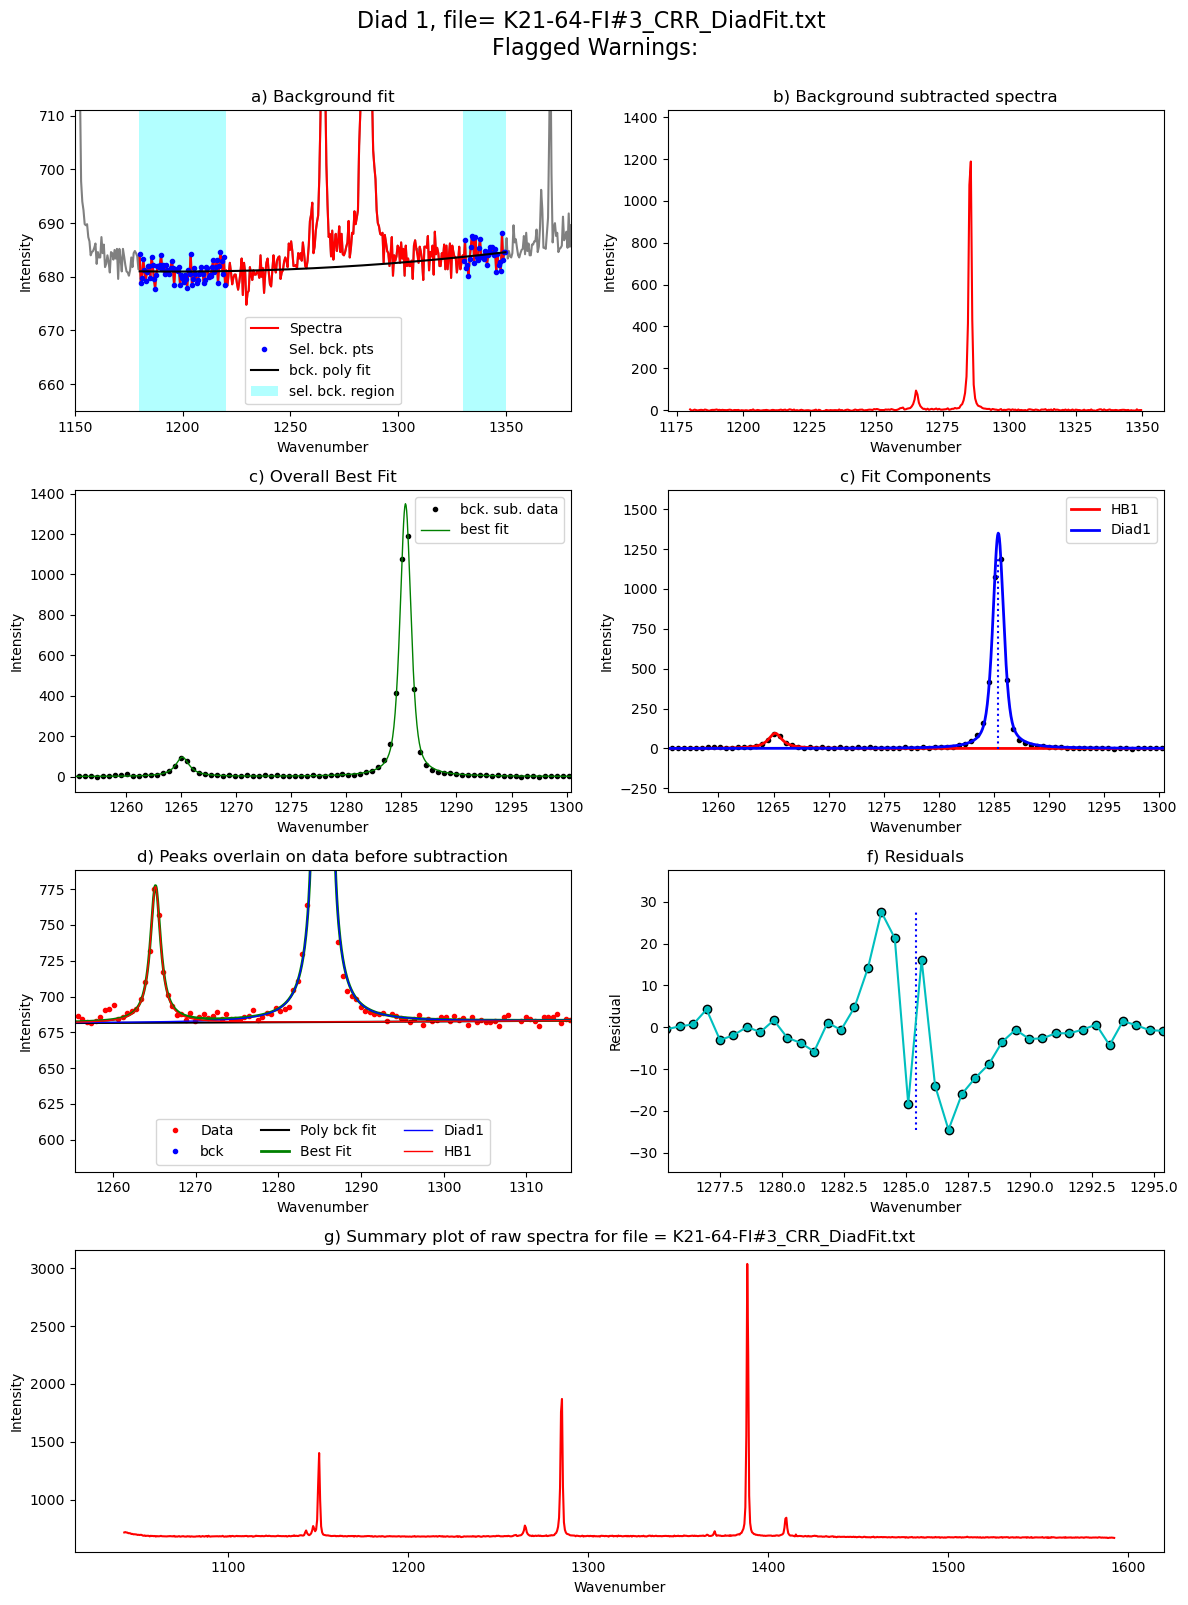

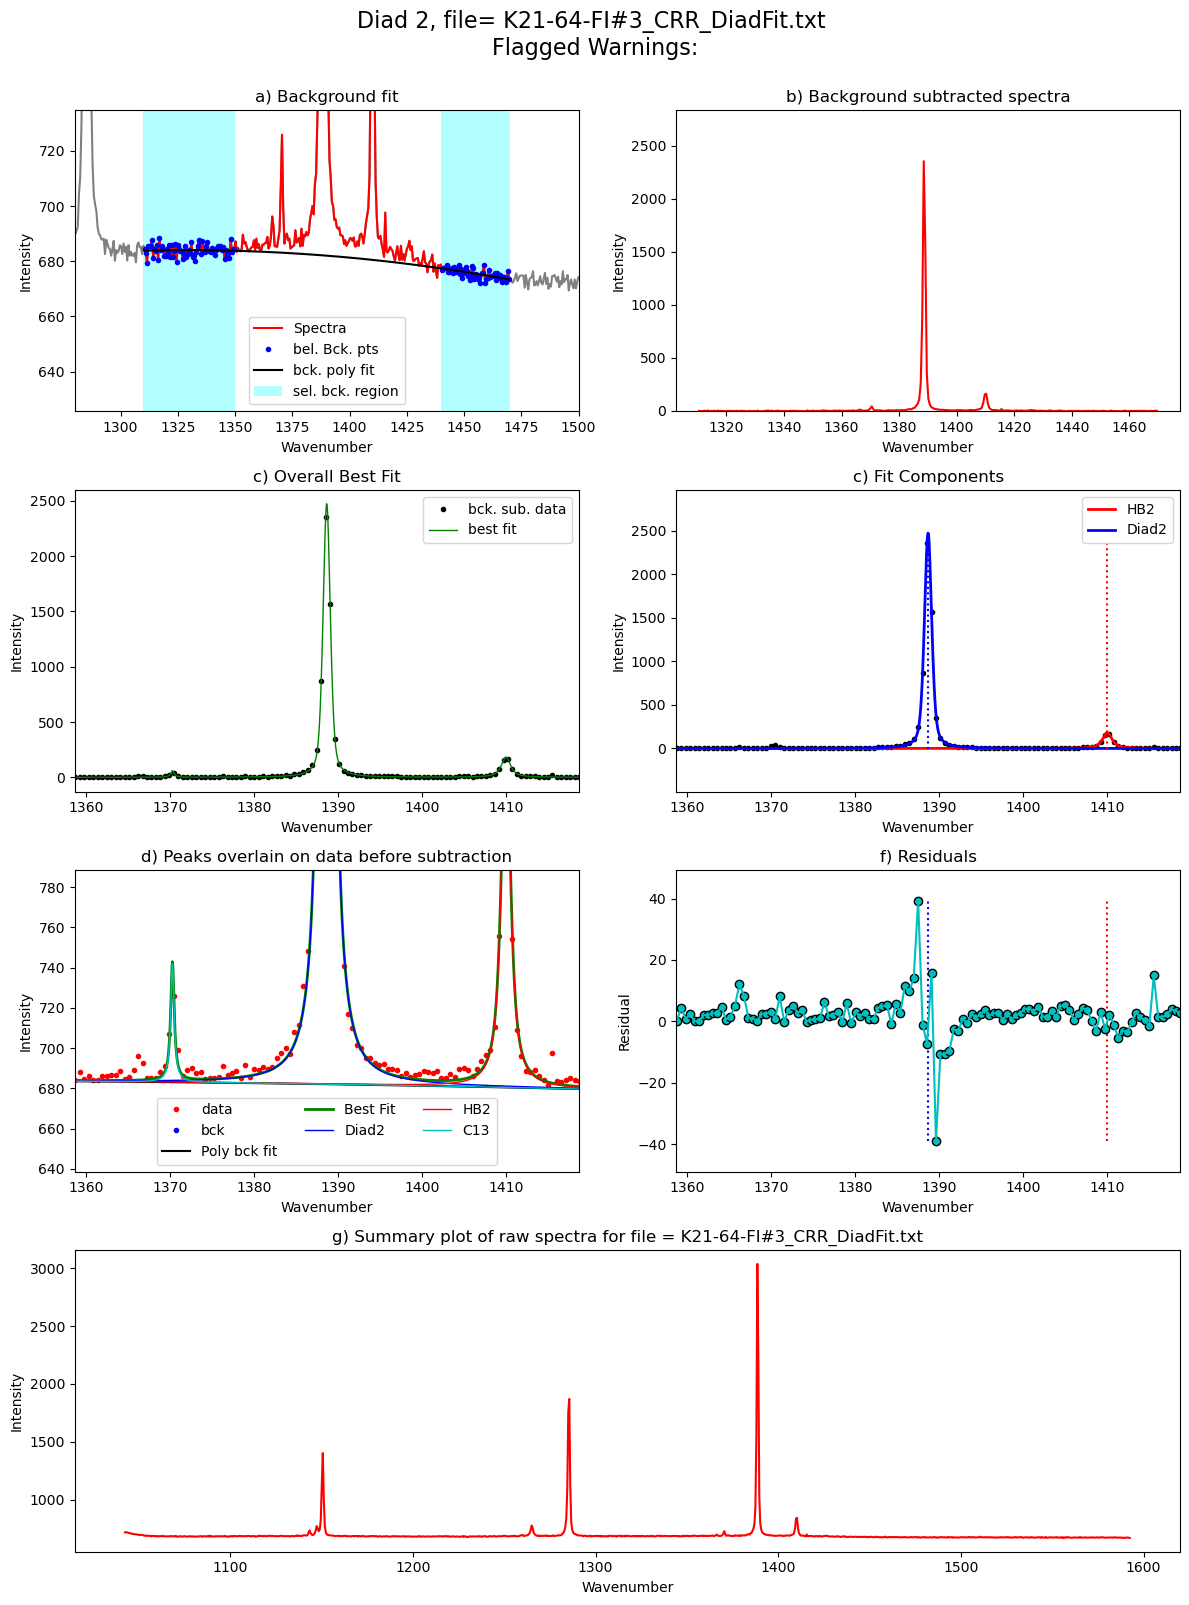

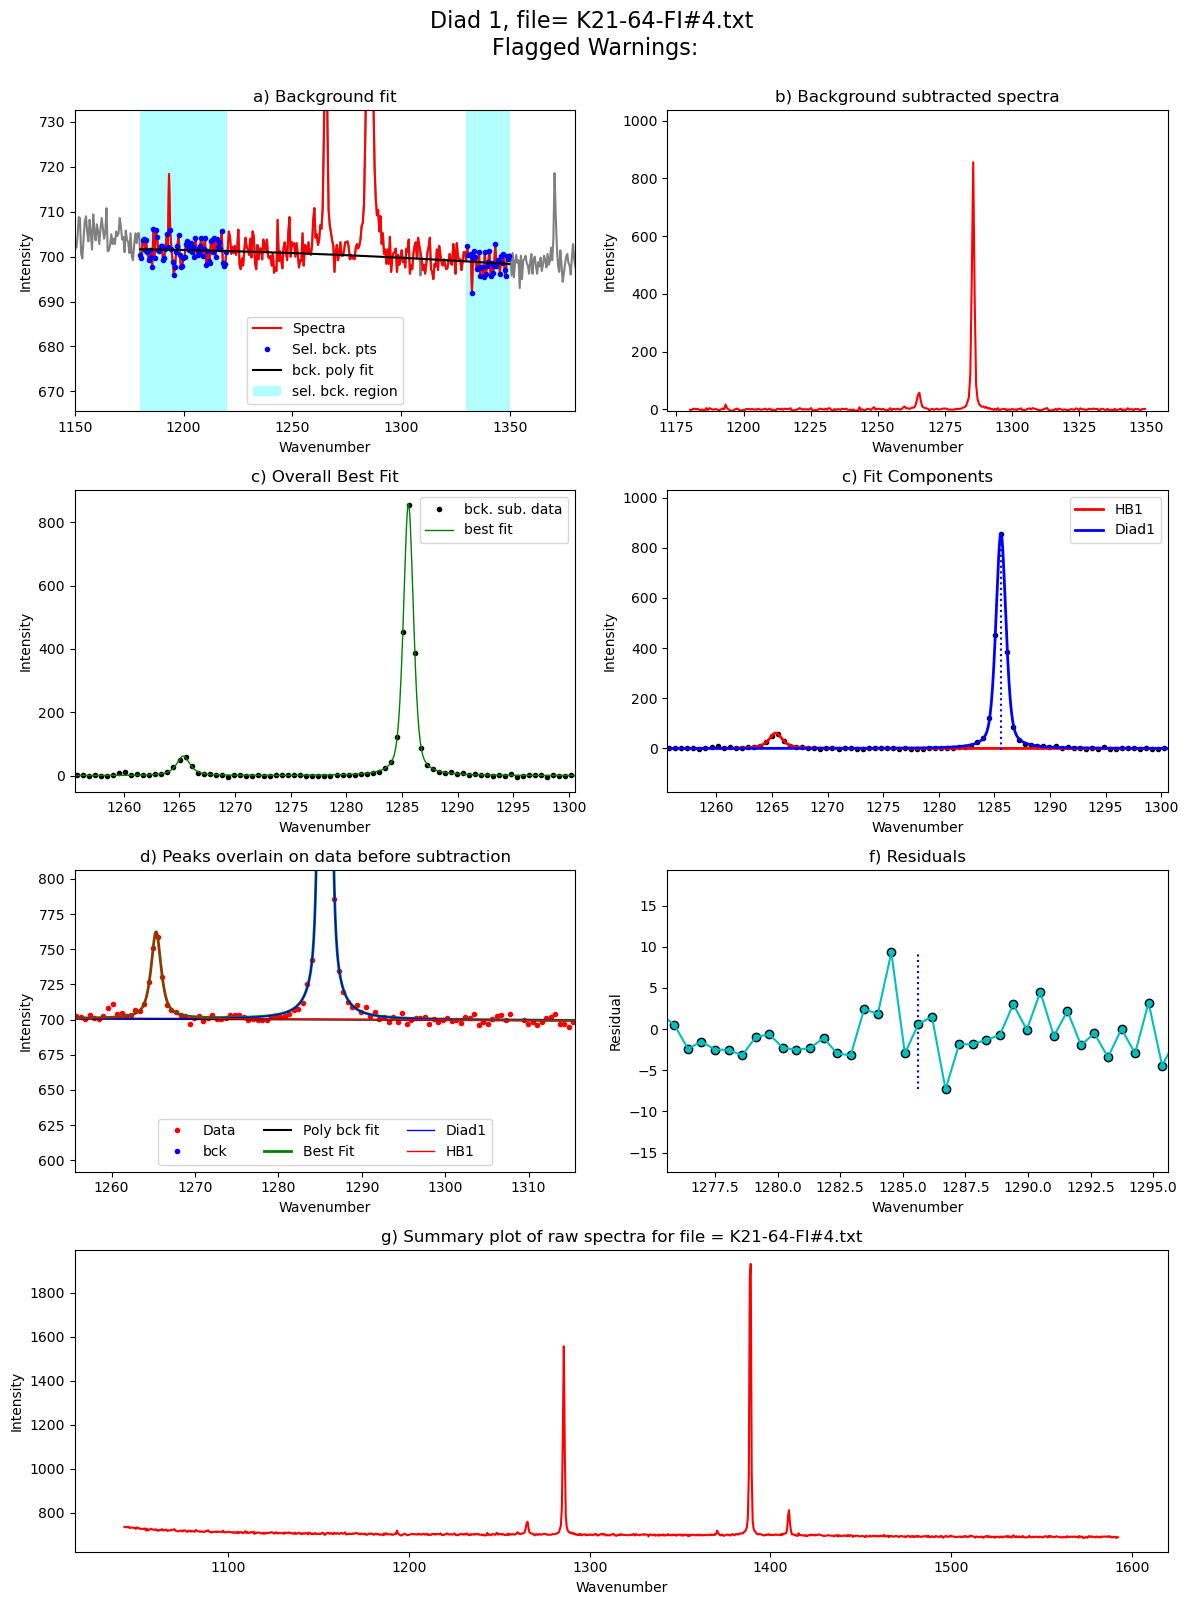

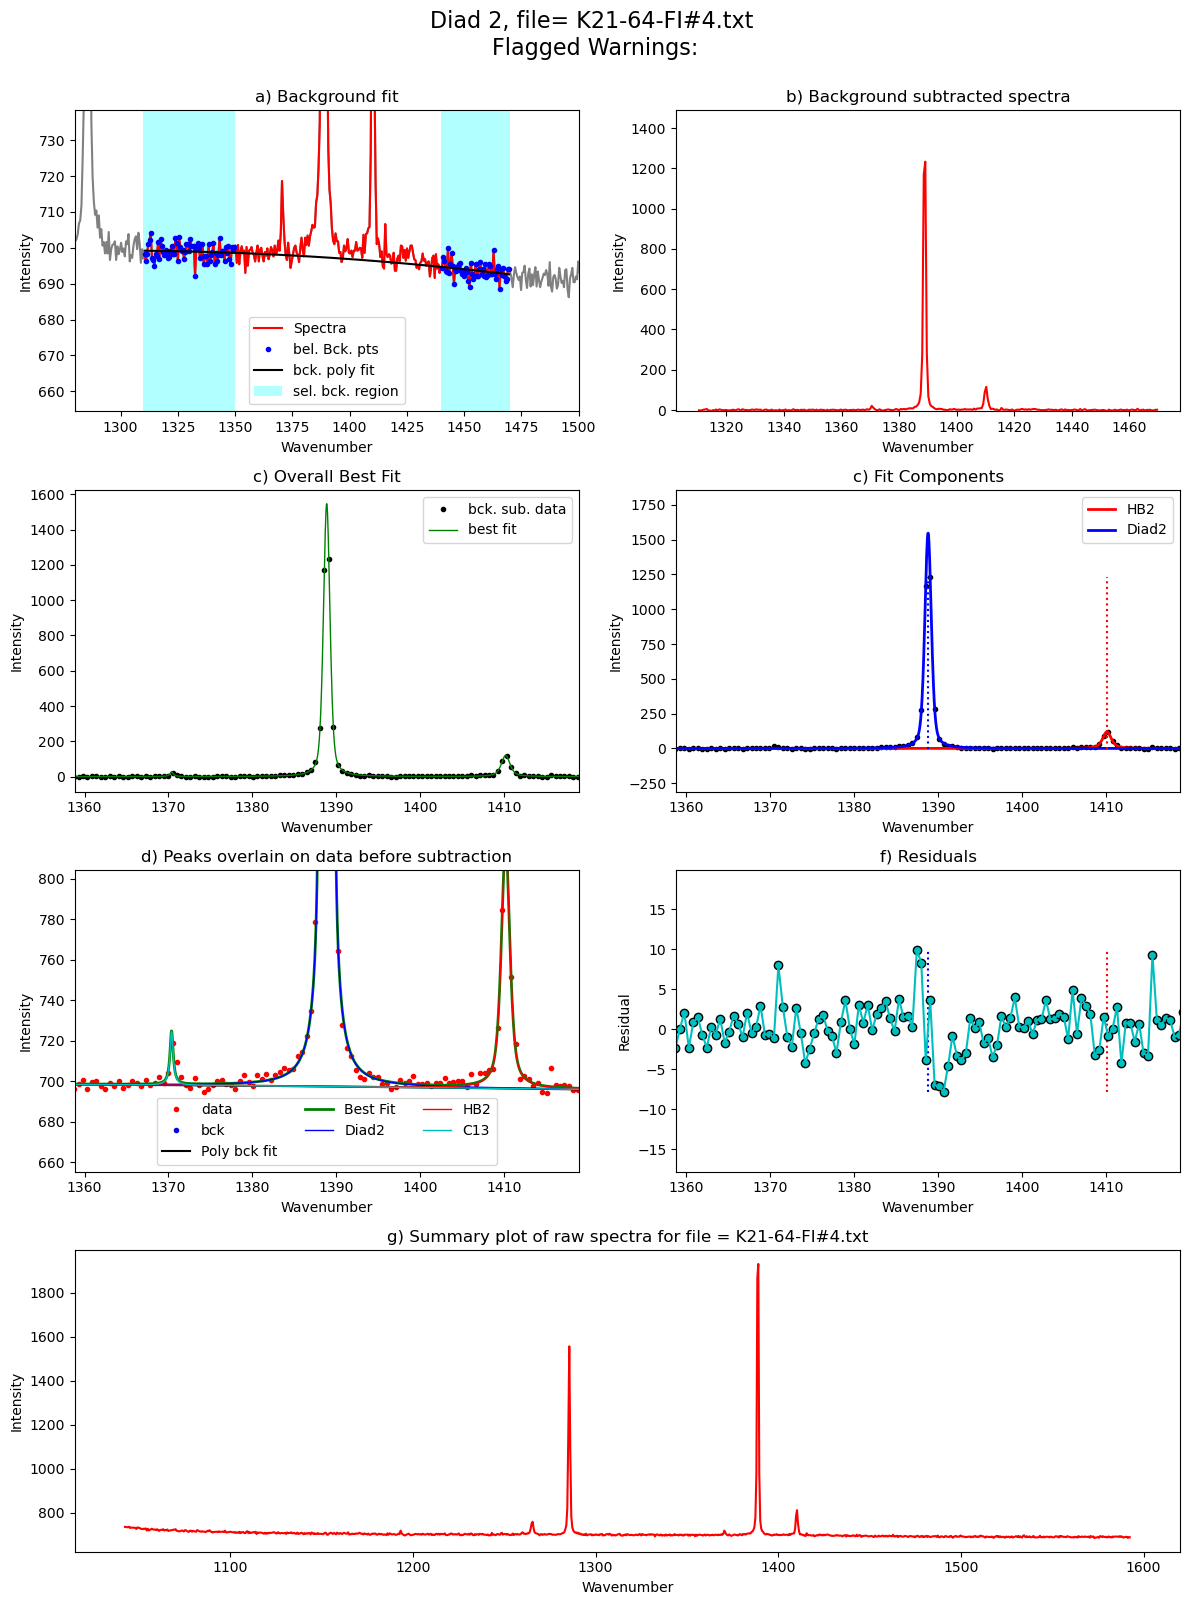

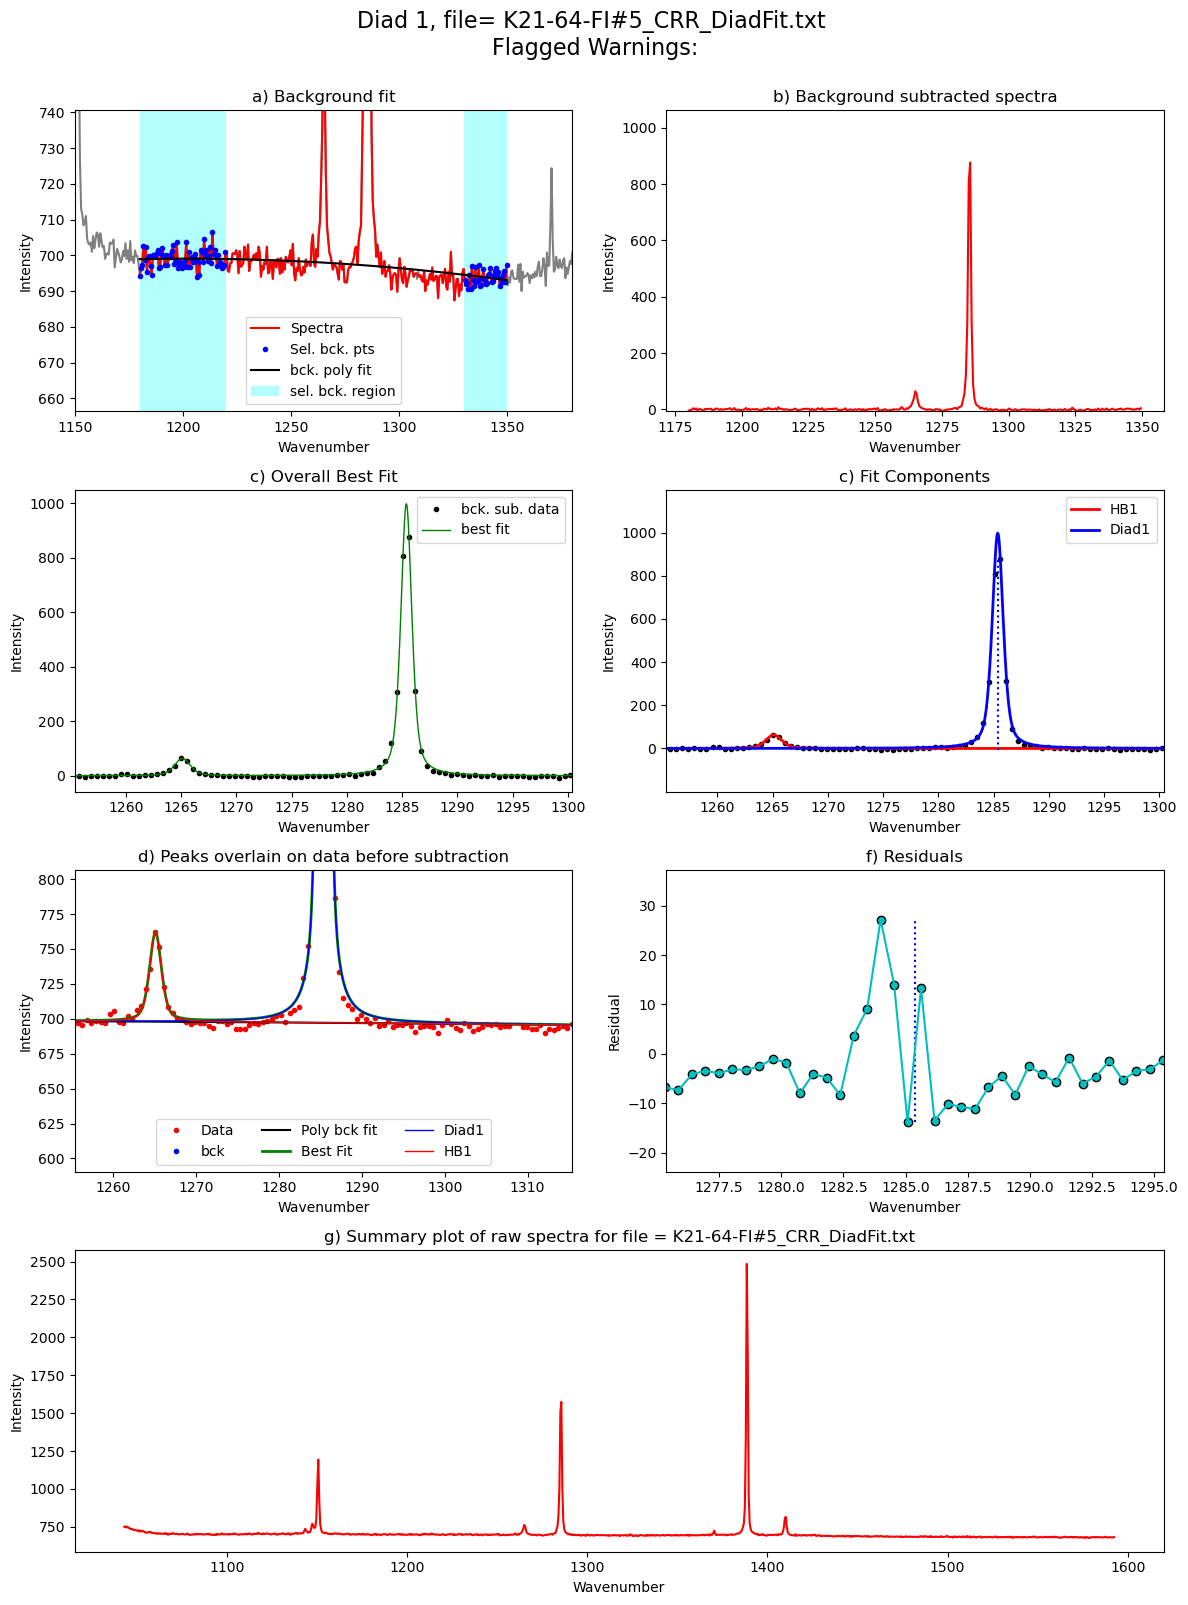

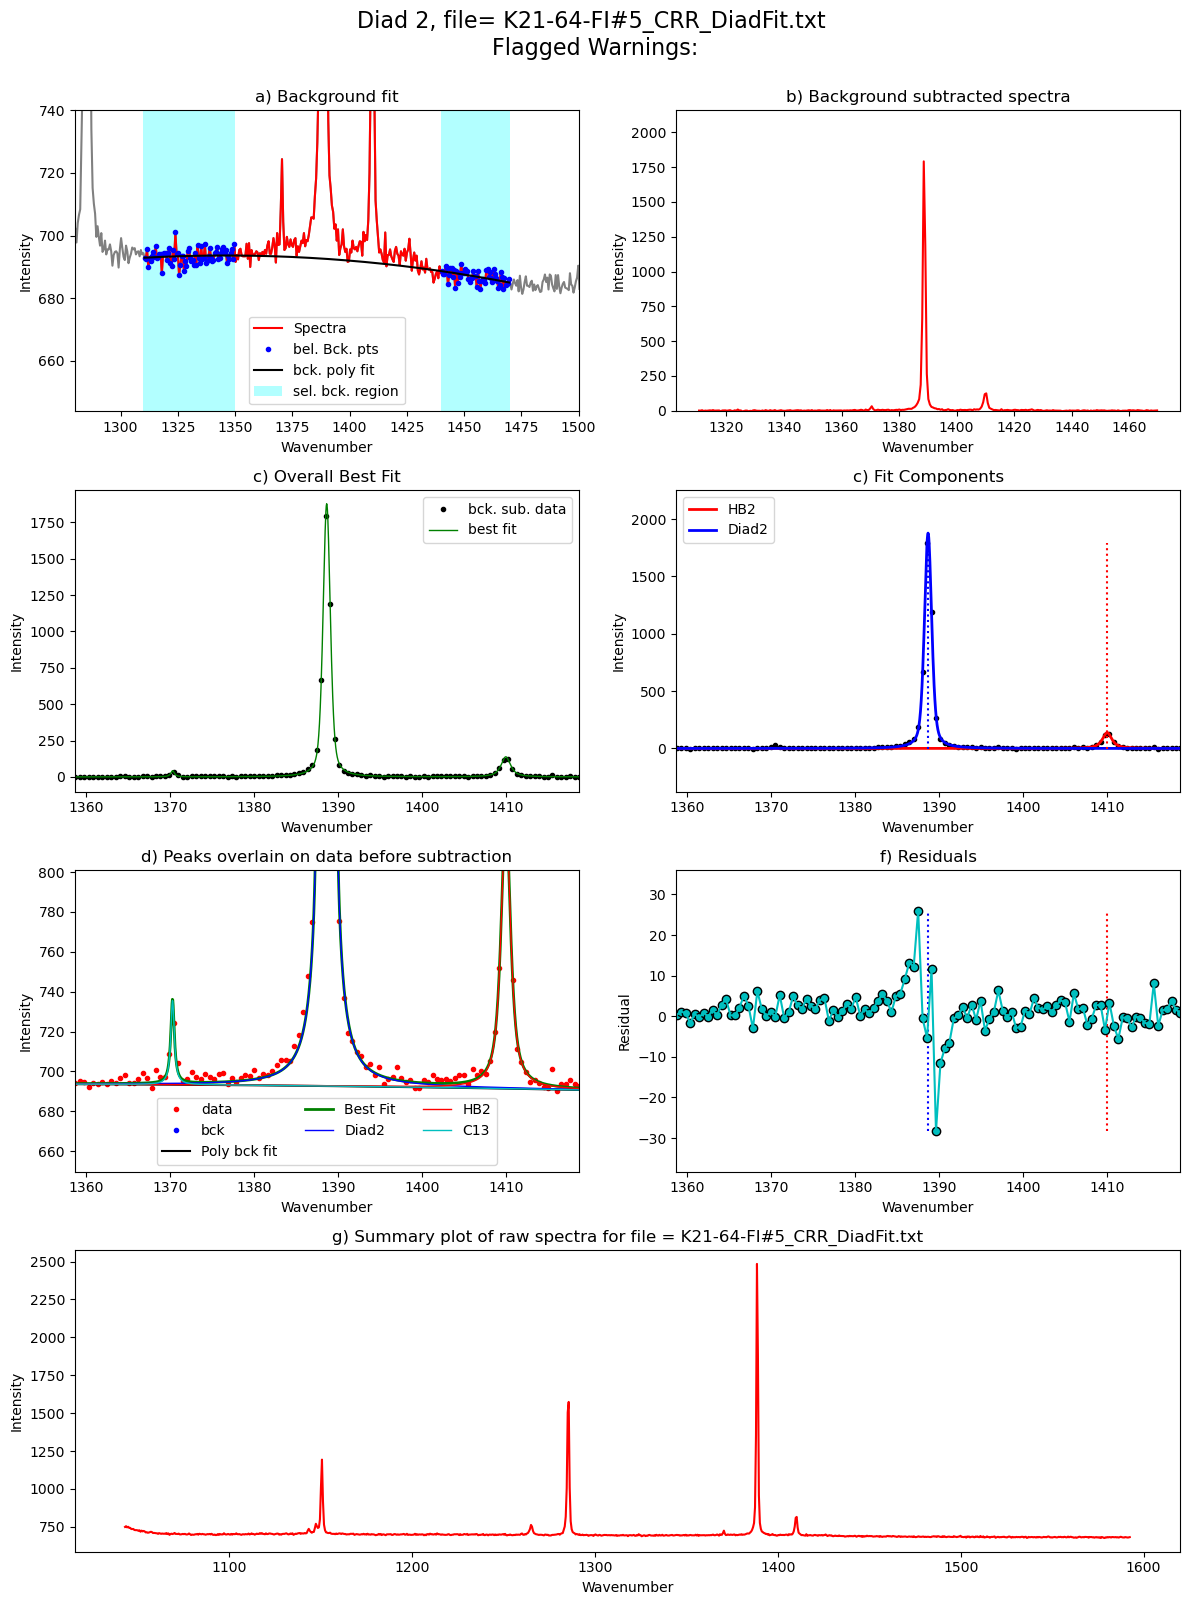

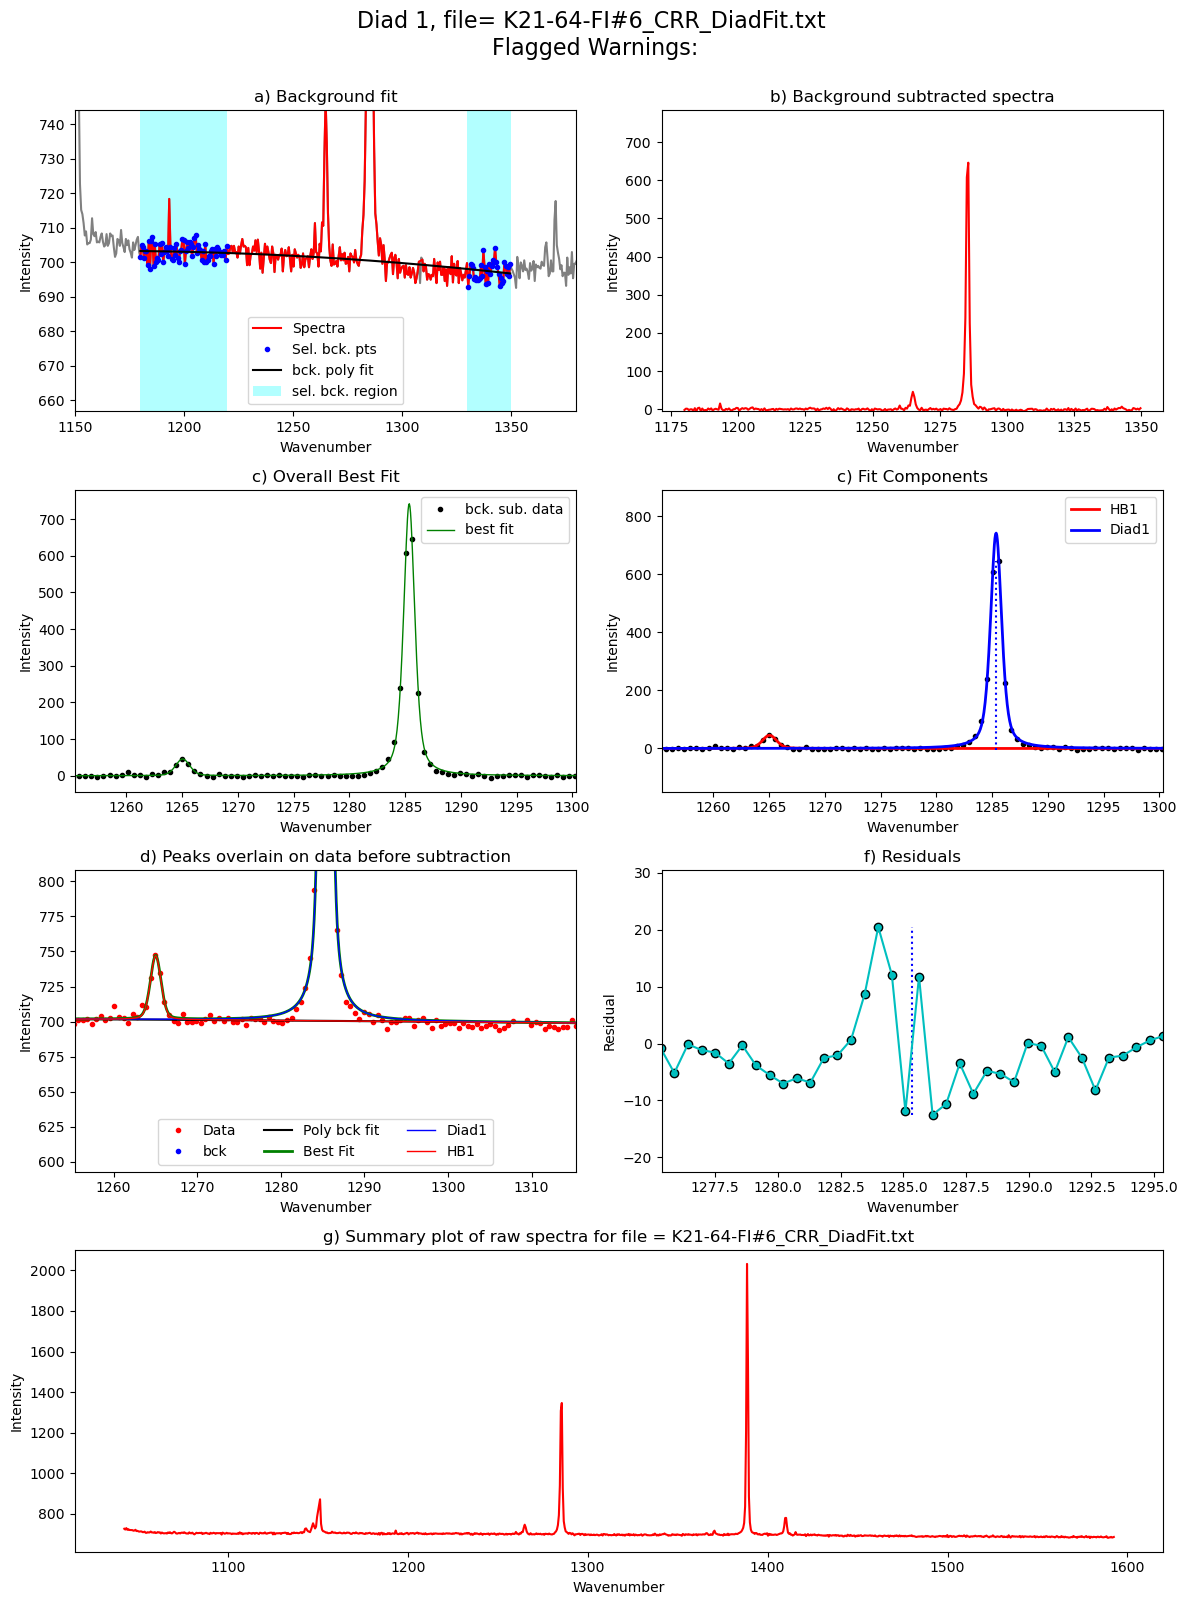

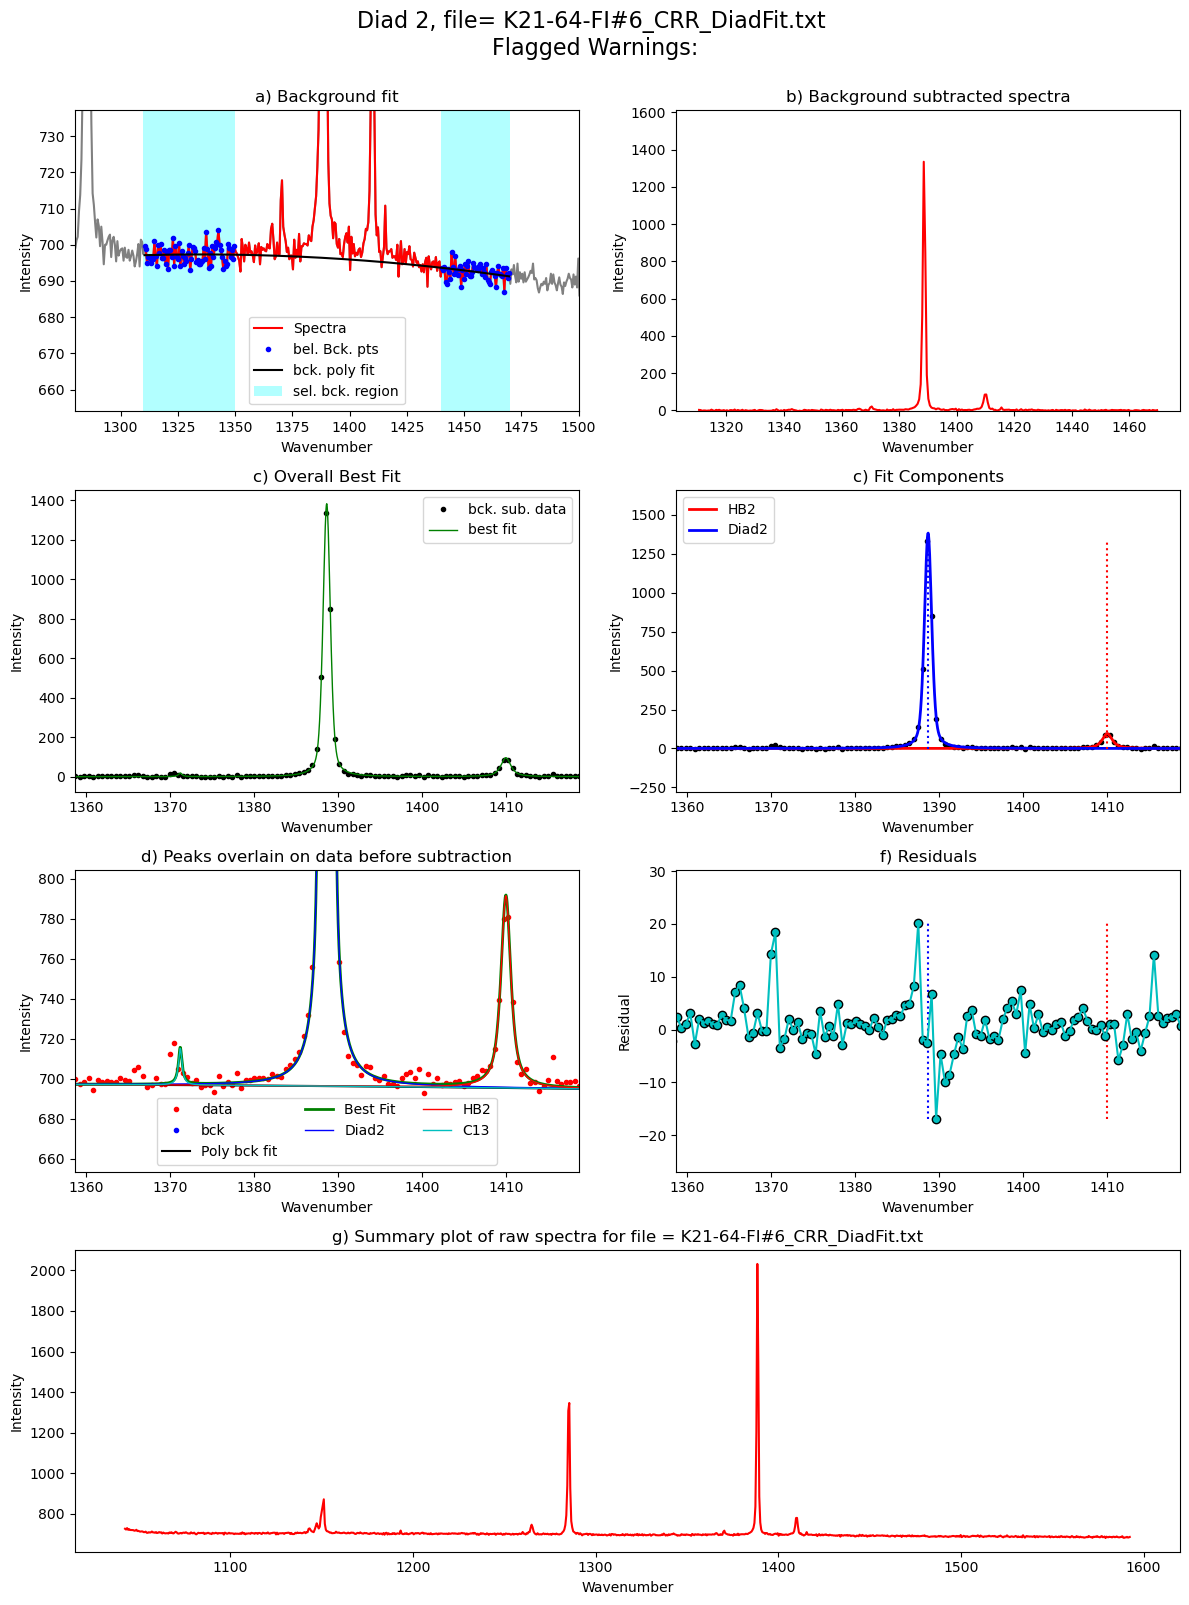

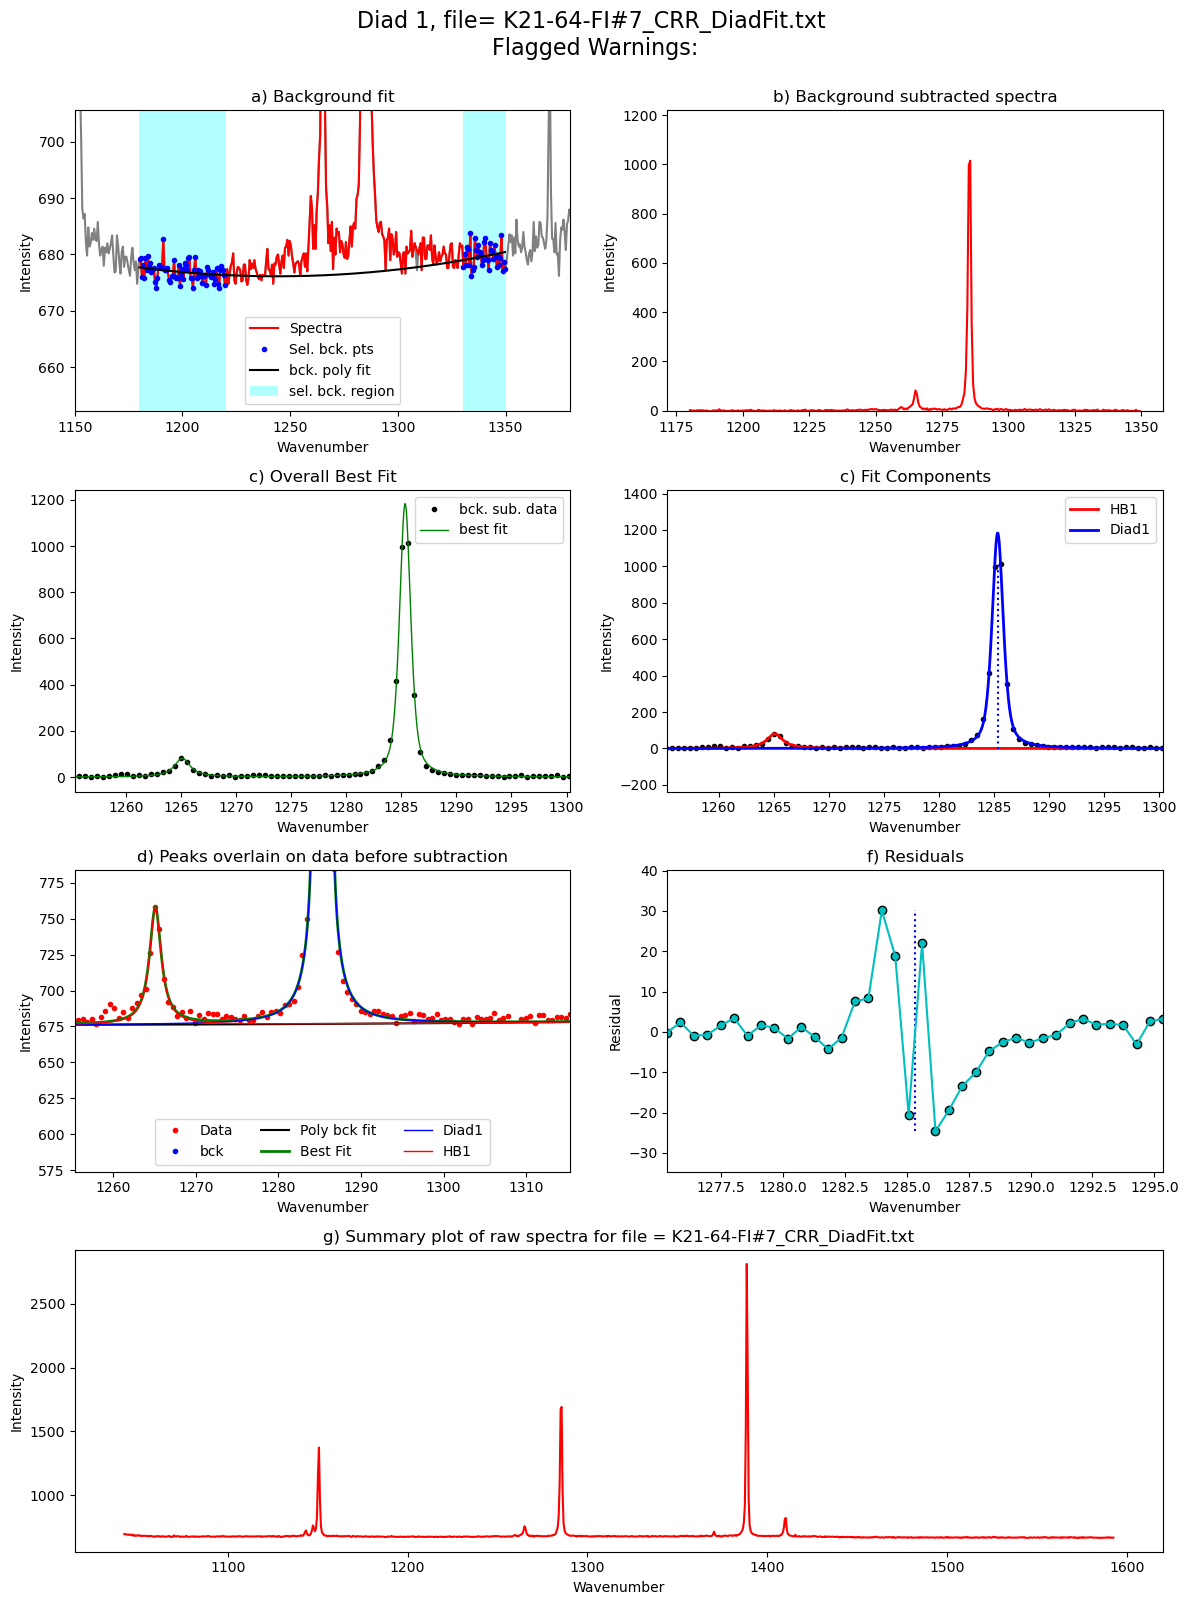

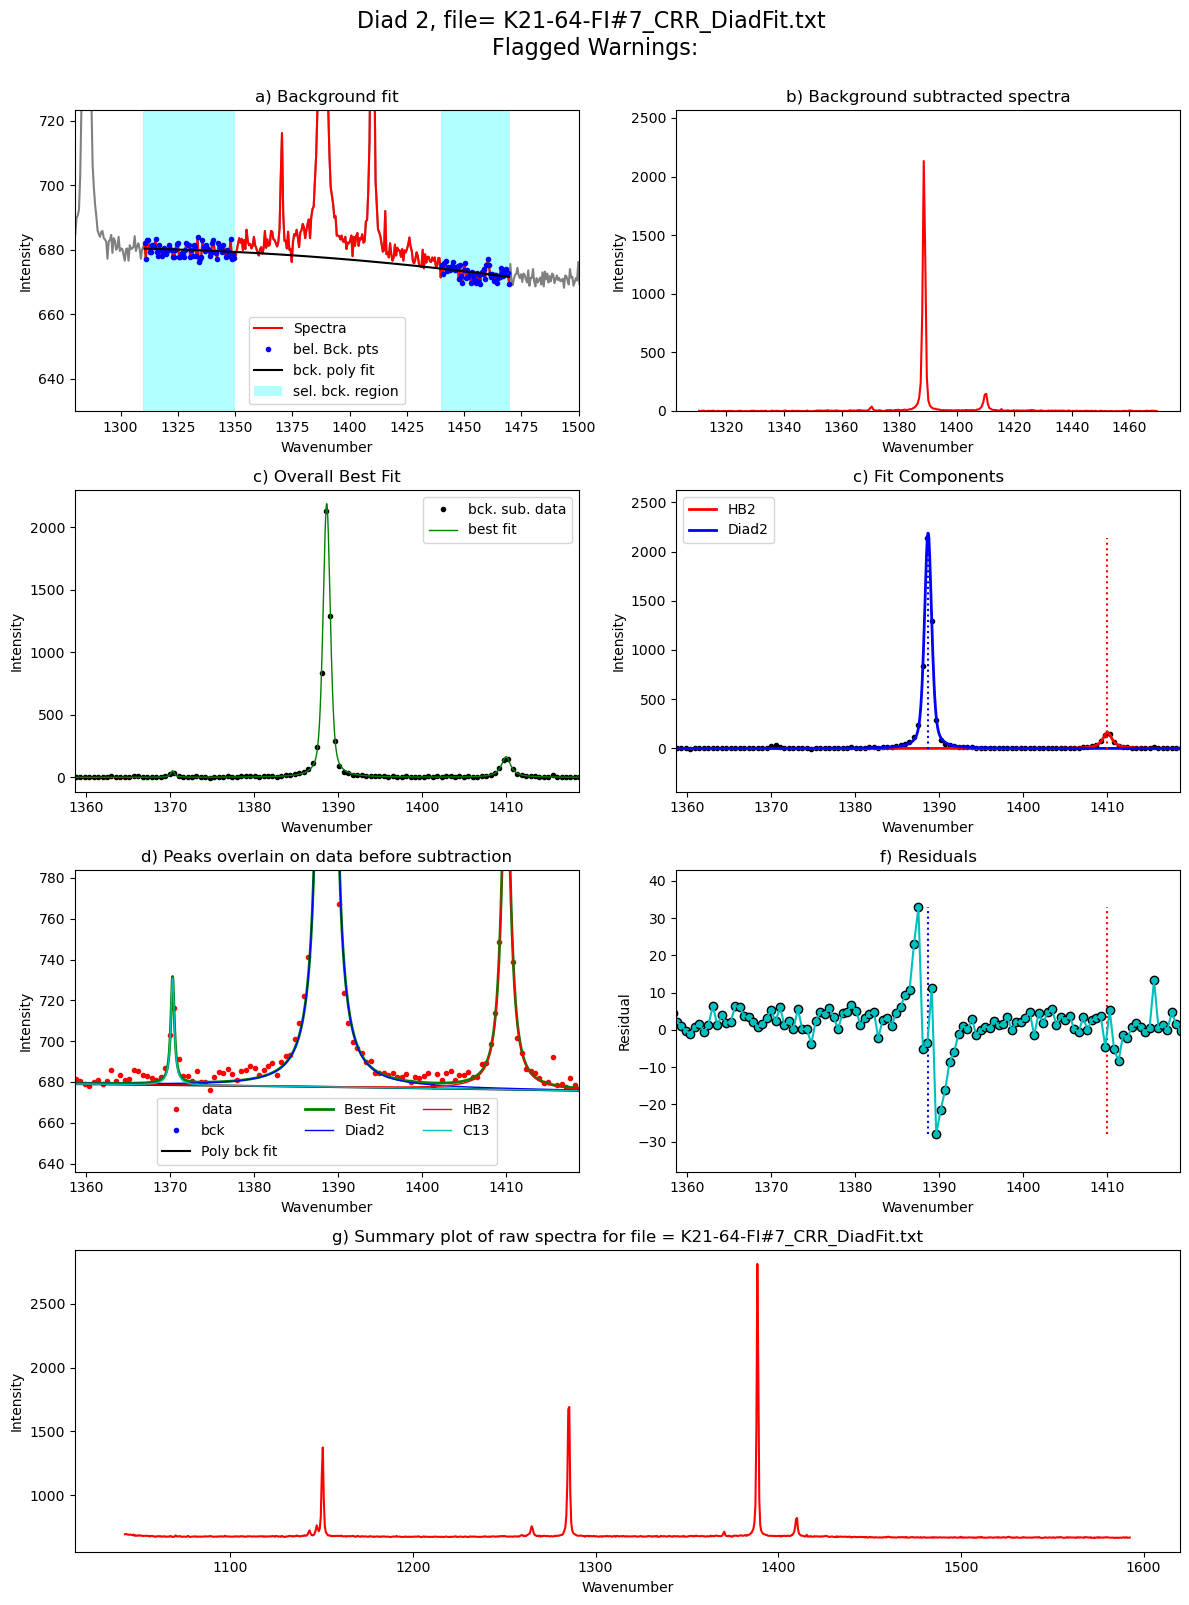

In [34]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


### Get file names that flagged a warning

In [35]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

0
Series([], Name: filename, dtype: object)


### Have a look at different parameters
- This can help you spot really bad fits

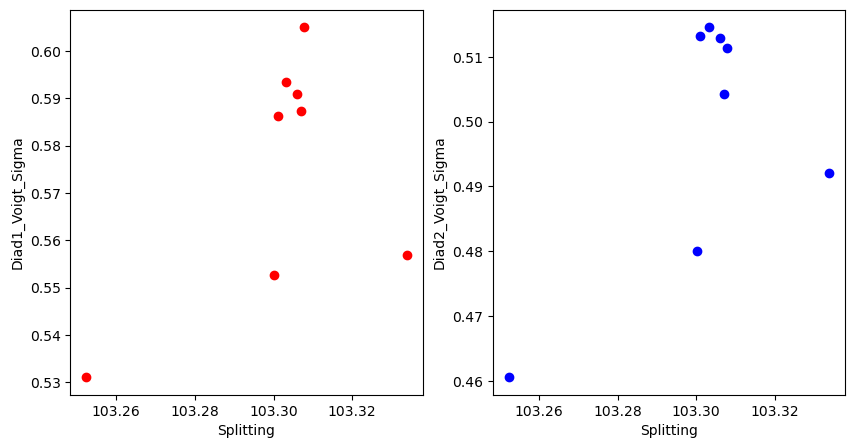

In [36]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

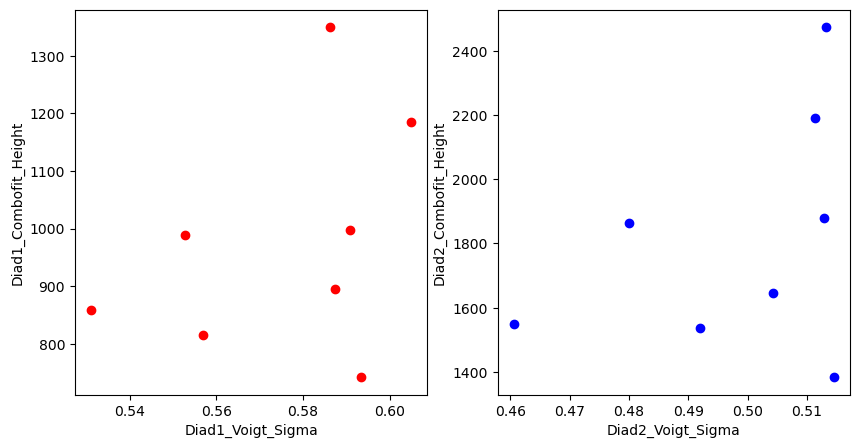

In [37]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [38]:
## Save parameters to excel

In [39]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')

In [40]:
combo

filename   Splitting  Split_err_abs  Split_err_quadrature  \
0              K21-61-FI#2  103.300128       0.002840              0.002090   
0              K21-61-FI#3  103.333811       0.003020              0.002167   
0  K21-64-FI#1_CRR_DiadFit  103.306928       0.004540              0.003502   
0  K21-64-FI#3_CRR_DiadFit  103.301040            NaN                   NaN   
0              K21-64-FI#4  103.252477       0.002237              0.001671   
0  K21-64-FI#5_CRR_DiadFit  103.306035            NaN                   NaN   
0  K21-64-FI#6_CRR_DiadFit  103.303277            NaN                   NaN   
0  K21-64-FI#7_CRR_DiadFit  103.307744            NaN                   NaN   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1285.470024         0.00183             988.944763   
0          1285.409241         0.00177             815.583662   
0          1285.401620         0.00326             894.576060   
0          1285.380951             NaN            1350.098659   
0          1285.586972         0.00150             858.619646   
0          1285.373768             NaN             997.880832   
0          1285.362566         0.00265             741.906688   
0          1285.341649         0.00213            1184.562521   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  ...  HB2_Sigma  \
0       1285.470074       1433.106729           0.552661  ...   0.608276   
0       1285.409291       1225.330167           0.556971  ...   0.687594   
0       1285.401670       1408.035217           0.587307  ...   0.651067   
0       1285.381001       2155.055147           0.586197  ...   0.652828   
0       1285.587022       1179.510115           0.531048  ...   0.608035   
0       1285.373818       1565.900510           0.590875  ...   0.672973   
0       1285.362616       1177.881031           0.593383  ...   0.705261   
0       1285.341699       1945.245171           0.605002  ...   0.664688   

      C13_Cent   C13_Area C13_Sigma  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0  1371.200733  24.958441  0.239659               NaN               NaN   
0  1370.363007  25.235069  0.245719               NaN               NaN   
0  1370.599369  29.965386  0.251970               NaN               NaN   
0  1370.312459  47.485353  0.256464               NaN               NaN   
0  1370.367824  19.137390  0.229792               NaN               NaN   
0  1370.322318  34.086290  0.256273               NaN               NaN   
0  1371.225501  14.858080  0.257175               NaN               NaN   
0  1370.298544  42.068594  0.255593               NaN               NaN   

   Diad2_Gauss_Sigma  Diad1_Gauss_Cent  Diad1_Gauss_Area  Diad1_Gauss_Sigma  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  

[8 rows x 40 columns]